# Cardiovascular Disease Prediction

## Data Description
Overview

This dataset consolidates information from two primary sources:
- UCI Machine Learning Repository - Heart Disease Dataset
- Kaggle - Heart Disease Dataset by YasserH

The primary aim is to predict the presence or absence of cardiovascular disease based on various patient metrics. <br>

Variables
- ID: Unique identifier for each patient.
- age: Age of the patient in days.
- age_years: Age of the patient in years (derived from age).
- gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
- height: Height of the patient in centimeters.
- weight: Weight of the patient in kilograms.
- ap_hi: Systolic blood pressure.
- ap_lo: Diastolic blood pressure.
- cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
- alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
- active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
- cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
- bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
- bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
- bp_category_encoded: Encoded form of bp_category for machine learning purposes.

Data Source and Acknowledgment
- Data was sourced from the UCI Machine Learning Repository and Kaggle.
- All patient data has been anonymized to ensure privacy.

Link: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease

## Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import csv
import os
import pickle
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc



## Data

In [31]:
# Data
df = pd.read_csv('cardio_data_processed.csv', index_col='id')
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  age_years        bmi           bp_category  \
id                                                                     
0      0       1       0         50  21.967120  Hypertension Stage 1   
1      0       1       1         55  34.927679  Hypertension Stage 2   
2      0       0       1         51  23.507805  Hypertension Stage 1   
3      0       1       1         48  28.710479  Hypertension Stage 2   
4      0       0       0         47  23.011177                Normal   

     bp_category_encoded  
id                        
0   Hypertension Stage 1  
1   Hypertension Stage 2  
2   Hypertension Stage 1  
3   Hypertension Stage 2  
4                 Normal

## EDA

In [32]:
df.shape

(68205, 16)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68205 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  68205 non-null  int64  
 1   gender               68205 non-null  int64  
 2   height               68205 non-null  int64  
 3   weight               68205 non-null  float64
 4   ap_hi                68205 non-null  int64  
 5   ap_lo                68205 non-null  int64  
 6   cholesterol          68205 non-null  int64  
 7   gluc                 68205 non-null  int64  
 8   smoke                68205 non-null  int64  
 9   alco                 68205 non-null  int64  
 10  active               68205 non-null  int64  
 11  cardio               68205 non-null  int64  
 12  age_years            68205 non-null  int64  
 13  bmi                  68205 non-null  float64
 14  bp_category          68205 non-null  object 
 15  bp_category_encoded  68205 non-null  obje

In [34]:
df.describe().T

count          mean          std           min           25%  \
age          68205.0  19462.667737  2468.381854  10798.000000  17656.000000   
gender       68205.0      1.348625     0.476539      1.000000      1.000000   
height       68205.0    164.372861     8.176756     55.000000    159.000000   
weight       68205.0     74.100688    14.288862     11.000000     65.000000   
ap_hi        68205.0    126.434924    15.961685     90.000000    120.000000   
ap_lo        68205.0     81.263925     9.143985     60.000000     80.000000   
cholesterol  68205.0      1.363243     0.678080      1.000000      1.000000   
gluc         68205.0      1.225174     0.571288      1.000000      1.000000   
smoke        68205.0      0.087662     0.282805      0.000000      0.000000   
alco         68205.0      0.053134     0.224302      0.000000      0.000000   
active       68205.0      0.803548     0.397317      0.000000      1.000000   
cardio       68205.0      0.493688     0.499964      0.000000      0.000000   
age_years    68205.0     52.823635     6.769909     29.000000     48.000000   
bmi          68205.0     27.510513     6.026497      3.471784     23.875115   

                      50%           75%           max  
age          19700.000000  21323.000000  23713.000000  
gender           1.000000      2.000000      2.000000  
height         165.000000    170.000000    250.000000  
weight          72.000000     82.000000    200.000000  
ap_hi          120.000000    140.000000    180.000000  
ap_lo           80.000000     90.000000    120.000000  
cholesterol      1.000000      1.000000      3.000000  
gluc             1.000000      1.000000      3.000000  
smoke            0.000000      0.000000      1.000000  
alco             0.000000      0.000000      1.000000  
active           1.000000      1.000000      1.000000  
cardio           0.000000      1.000000      1.000000  
age_years       53.000000     58.000000     64.000000  
bmi             26.346494     30.116213    298.666667

In [35]:
# Check for null values
df.isna().sum()

age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

There seems to be no null values.

In [36]:
# check for duplicated records
df.duplicated().sum()

np.int64(24)

In [37]:
# dropping bp_category_encoded as it contains same values as bg_category
df = df.drop(columns='bp_category_encoded',axis=1)

# dropping age as age years can be used
df = df.drop(columns='age',axis=1)
df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                         
0        2     168    62.0    110     80            1     1      0     0   
1        1     156    85.0    140     90            3     1      0     0   
2        1     165    64.0    130     70            3     1      0     0   
3        2     169    82.0    150    100            1     1      0     0   
4        1     156    56.0    100     60            1     1      0     0   

    active  cardio  age_years        bmi           bp_category  
id                                                              
0        1       0         50  21.967120  Hypertension Stage 1  
1        1       1         55  34.927679  Hypertension Stage 2  
2        0       1         51  23.507805  Hypertension Stage 1  
3        1       1         48  28.710479  Hypertension Stage 2  
4        0       0         47  23.011177                Normal

In [38]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [39]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != "y"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O" and feature != "y"]
numerical_features, categorical_features

(['gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio',
  'age_years',
  'bmi'],
 ['bp_category'])

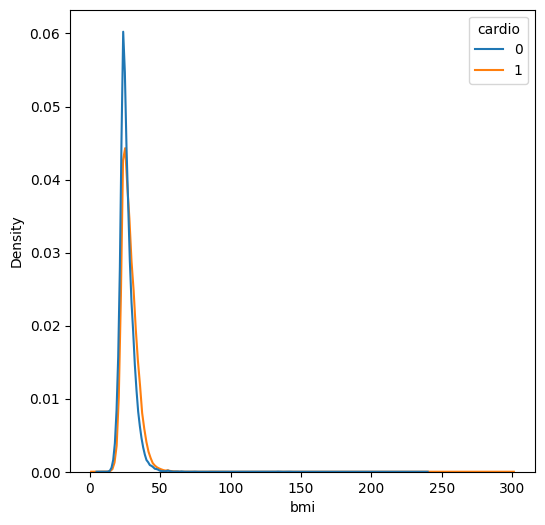

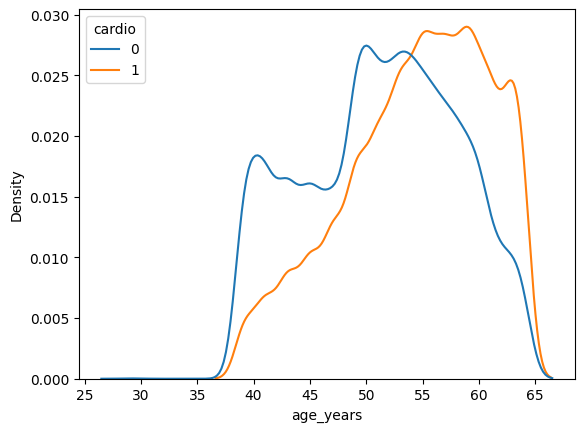

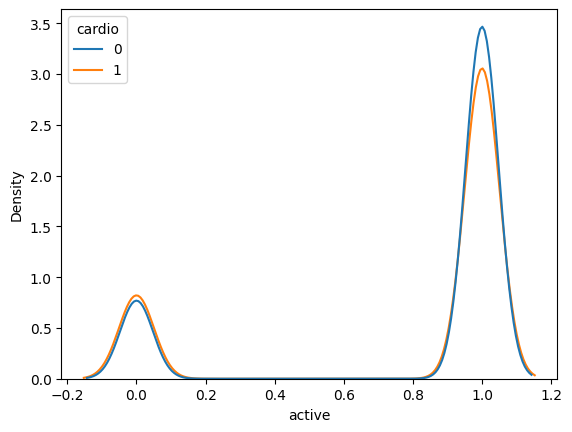

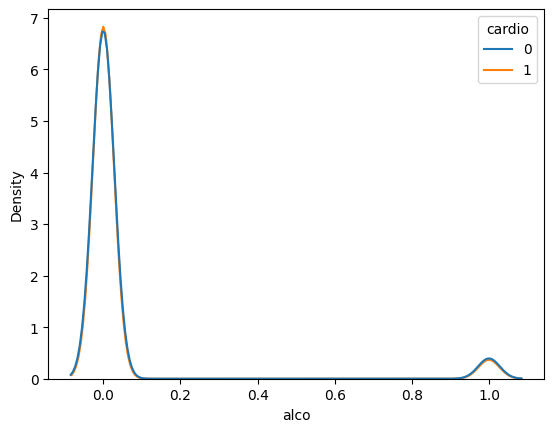

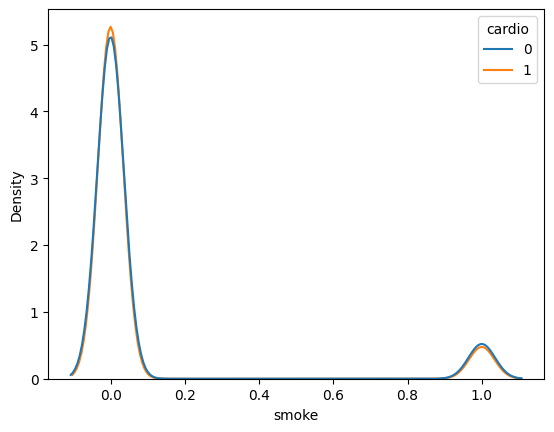

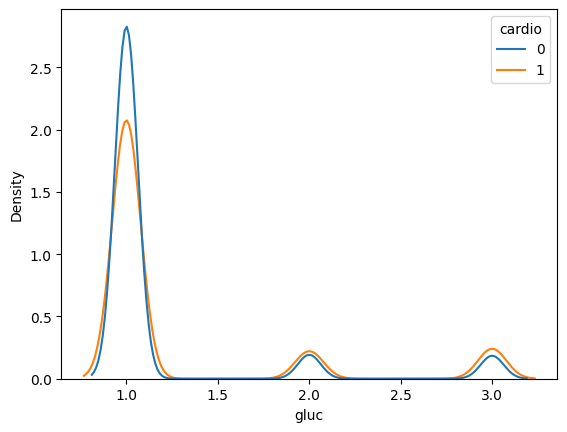

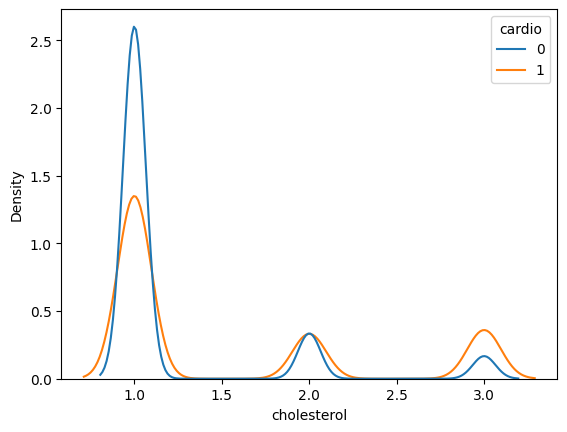

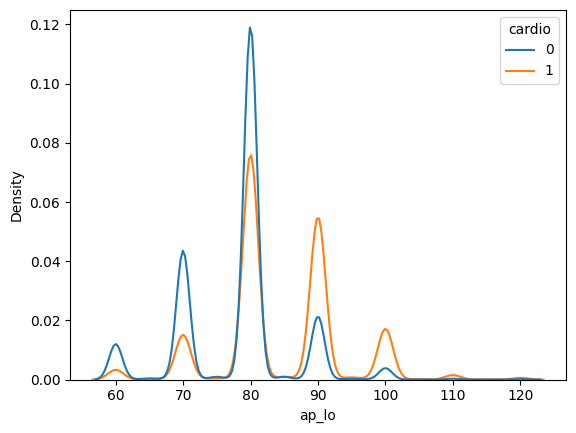

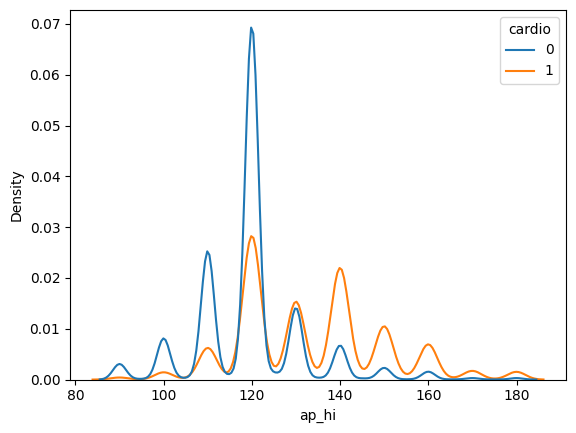

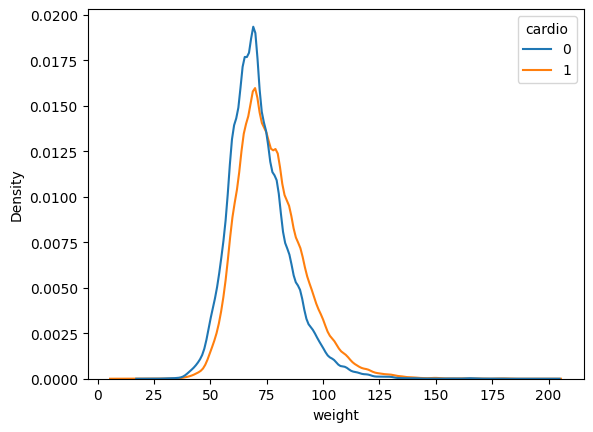

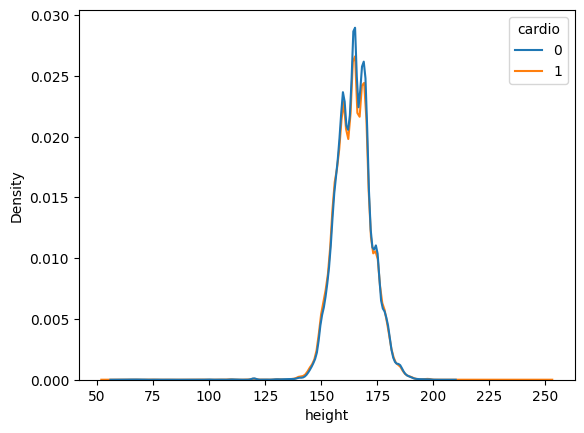

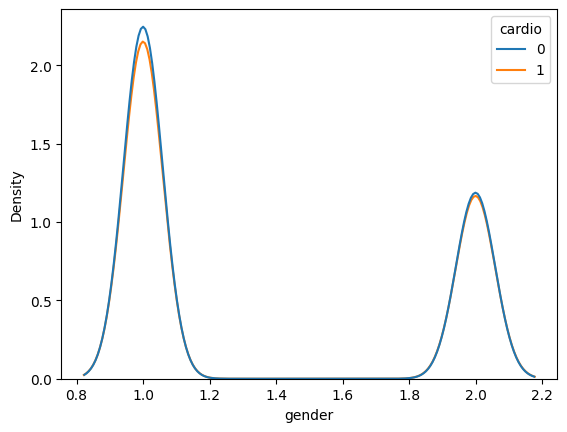

In [40]:
plt.figure(figsize=(6,6))
num_feat = numerical_features[::-1]
num_feat.remove('cardio')
for feature in num_feat:
    if numerical_features == 'cardio':
        continue
    sns.kdeplot(data=df, x=feature, hue='cardio')
    plt.show()

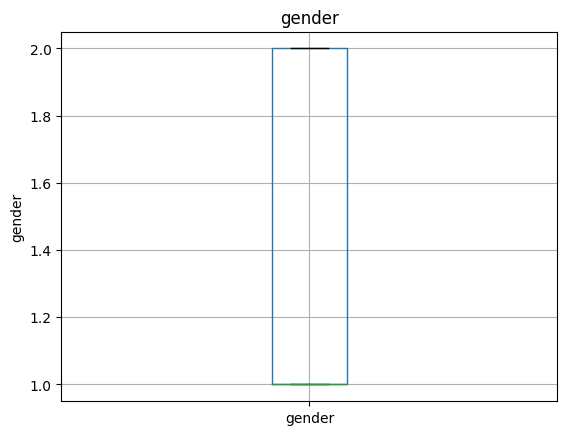

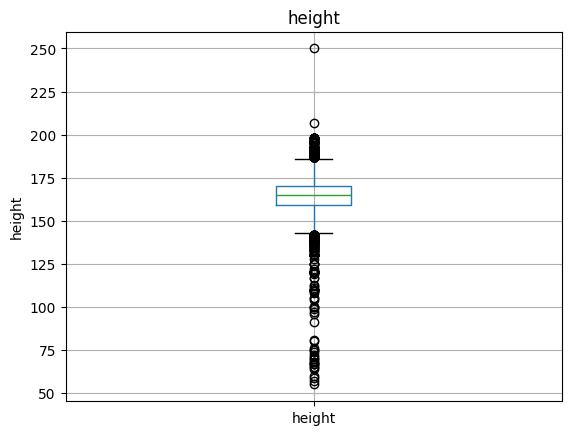

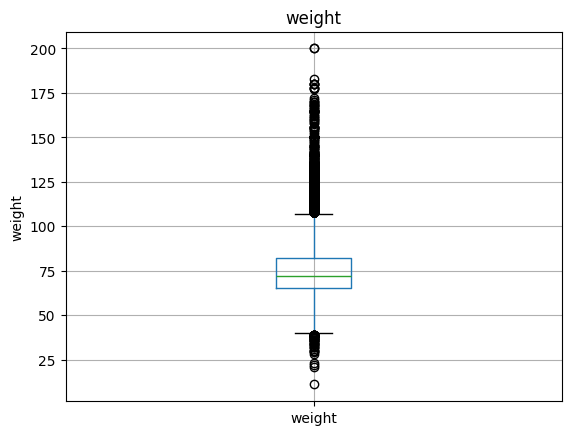

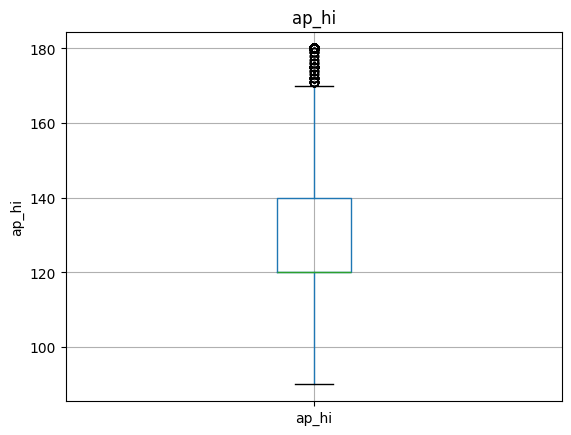

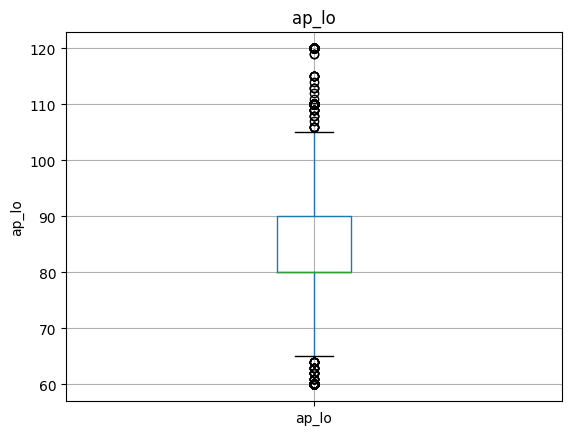

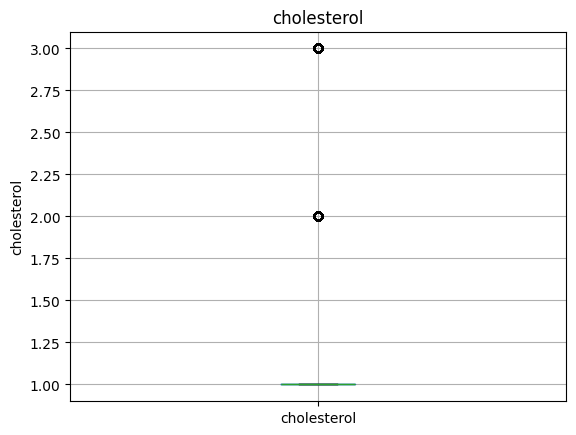

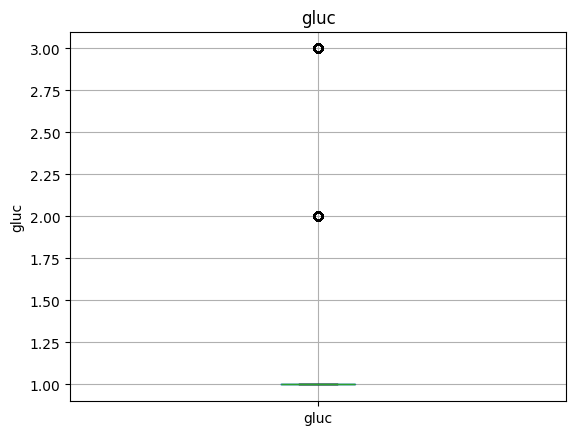

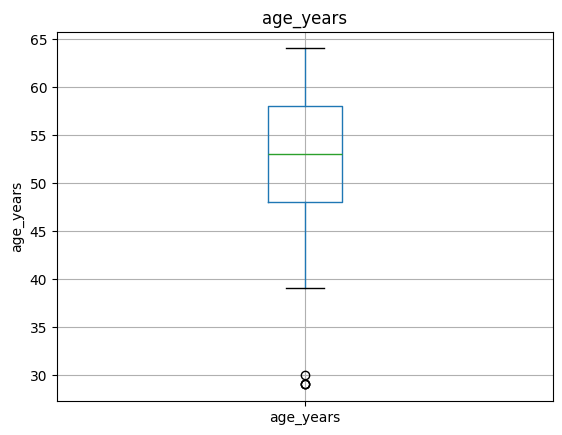

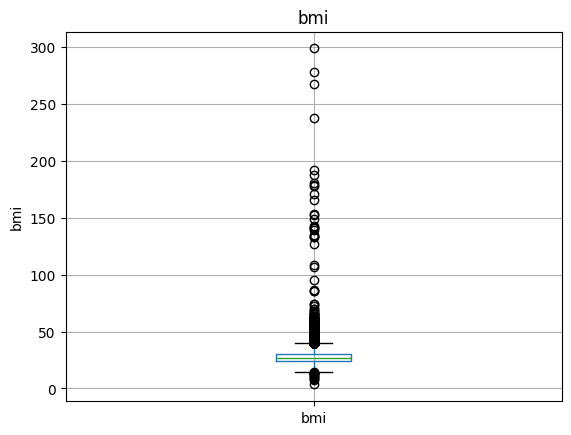

In [41]:
for feature in numerical_features:
  data = df.copy()

  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = data[feature]
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

The bmi column seems abnormal as normal bmi ranges from 10 - 100 (40 + are rare)

In [42]:
df[['height', 'weight']]

height  weight
id                   
0         168    62.0
1         156    85.0
2         165    64.0
3         169    82.0
4         156    56.0
...       ...     ...
99993     168    76.0
99995     158   126.0
99996     183   105.0
99998     163    72.0
99999     170    72.0

[68205 rows x 2 columns]

In [44]:
df['bmi'][df['bmi'] > 100].shape

(26,)

In [15]:
df['bmi'][df['bmi'] > 100]

id
8757     108.169847
11662    180.678074
18218    298.666667
18928    134.893870
20459    126.977055
21686    138.775510
21958    106.880000
23859    178.962747
28605    133.131378
32207    140.570934
32456    267.768595
34186    237.768633
39156    278.125000
39462    148.925781
41661    191.666667
45832    142.746914
48009    170.414201
63545    142.011834
66161    153.546713
67631    133.333333
72476    133.660058
73386    140.816327
76116    178.213411
85128    152.551775
91523    165.469693
95141    187.750077
Name: bmi, dtype: float64

In [16]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category',
       'bmi_eval'],
      dtype='object')

In [45]:
# rechecking if bmi is calculated properly
# bmi formula = weight(kg) / height(m)^2
df['temp_bmi'] = df['weight'] / (df['height'] / 100)**2
df['bmi'][df['temp_bmi'] > 100].shape

(26,)

Dropping records that contains bmi greater than 100

In [47]:
# dropping records that contain bmi greater than 50
df = df.drop(['temp_bmi'], axis=1)
df = df[df['bmi'] < 100]
df.shape

(68179, 14)

In [48]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

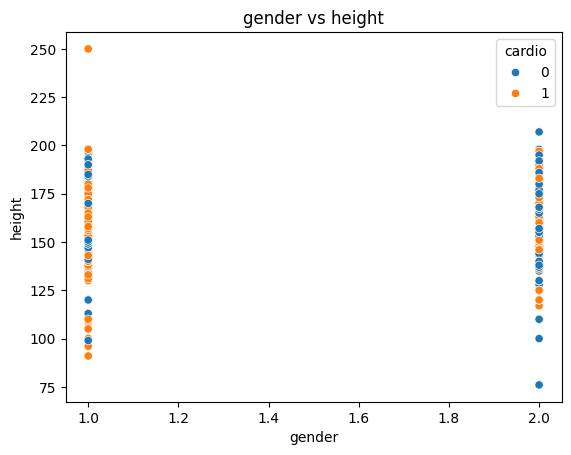

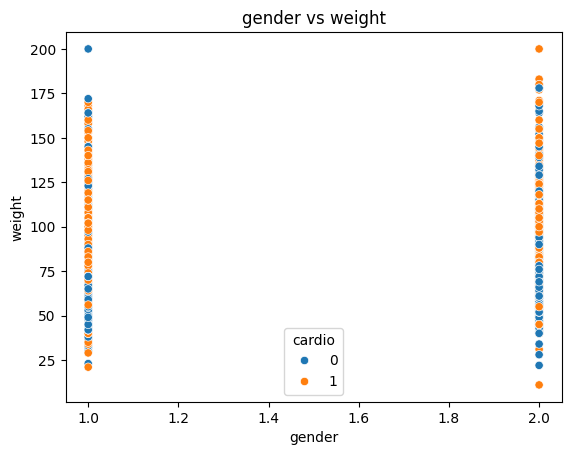

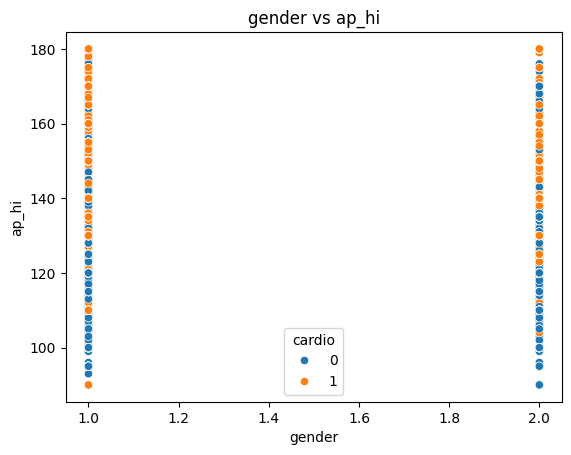

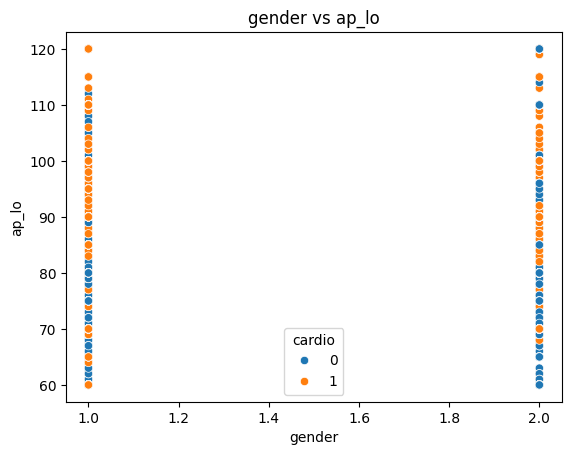

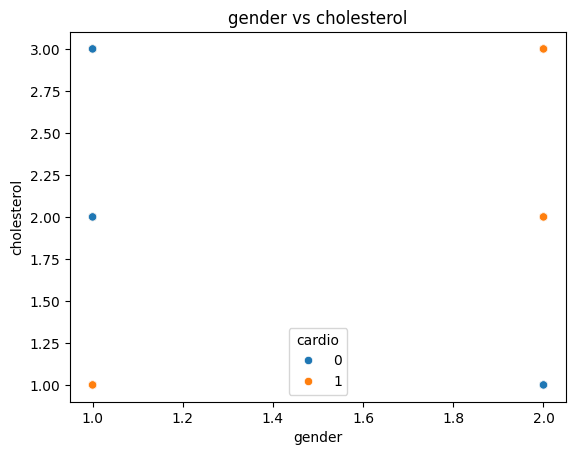

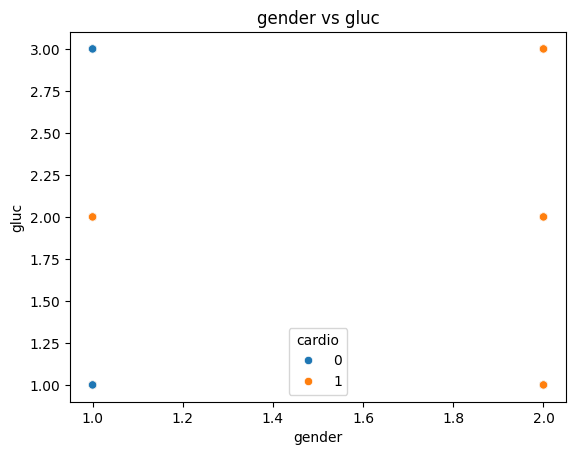

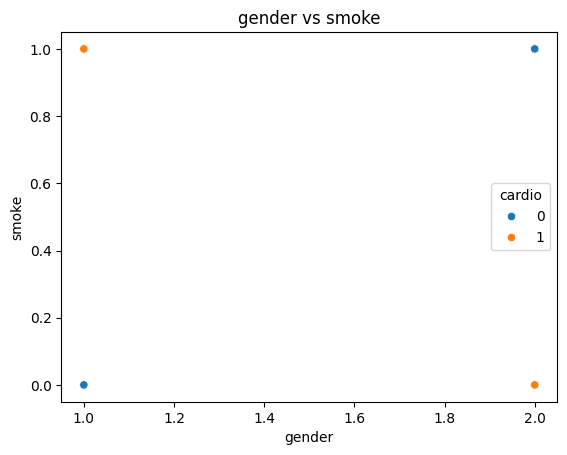

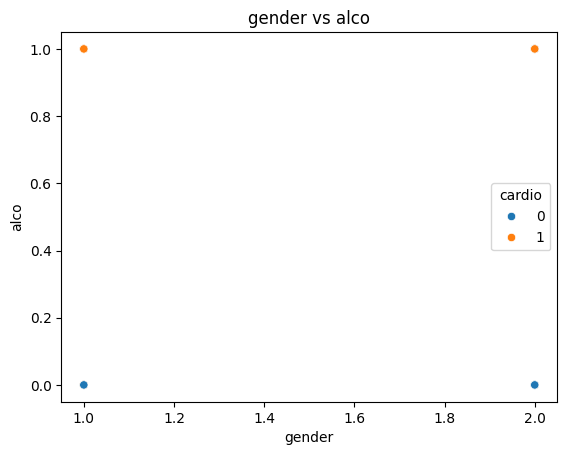

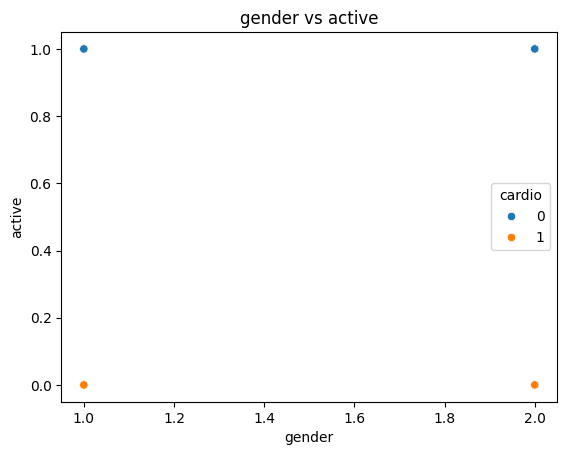

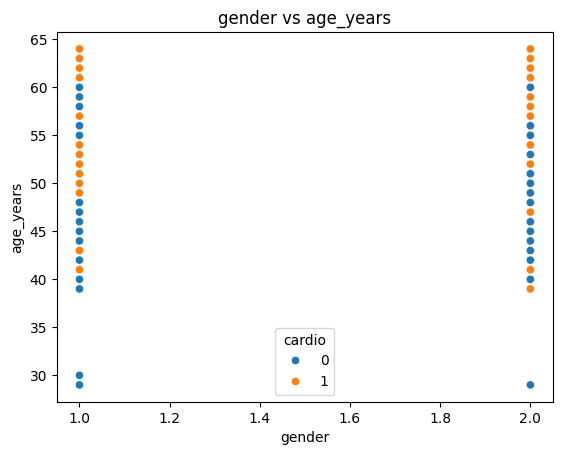

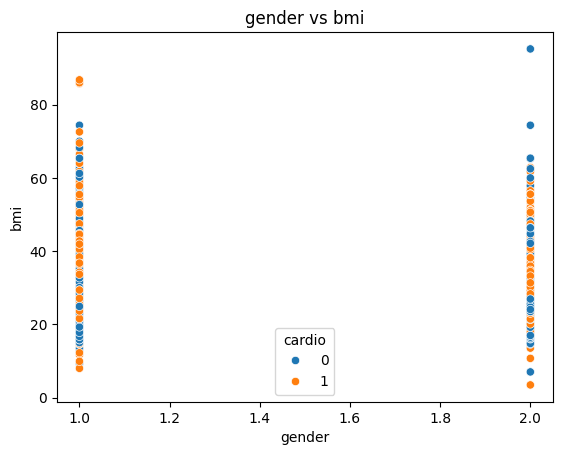

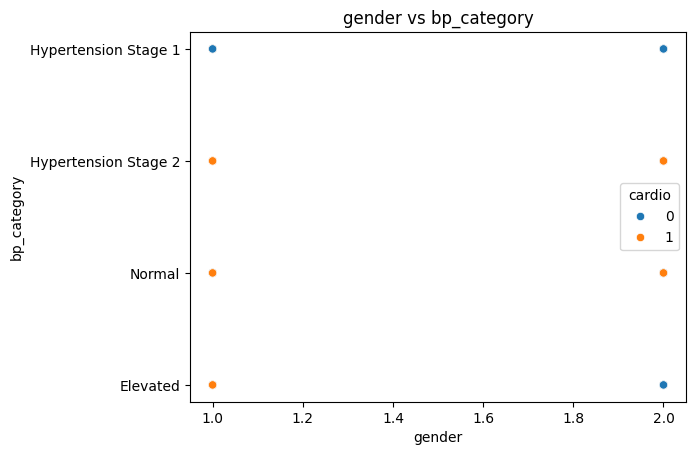

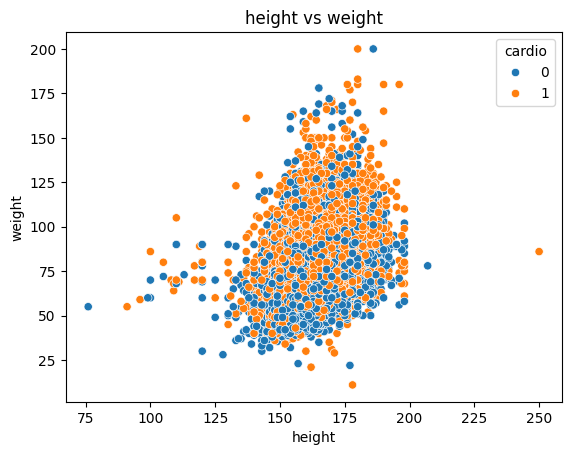

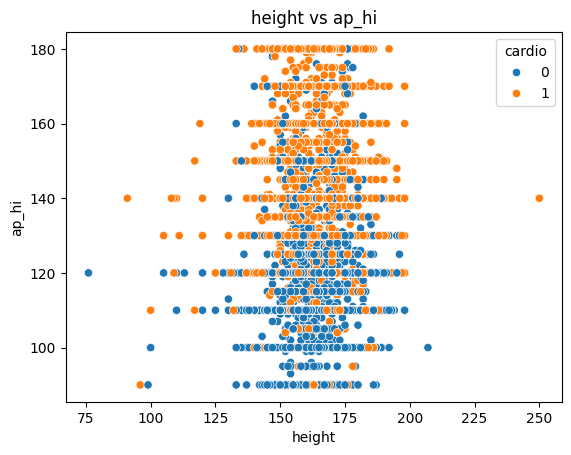

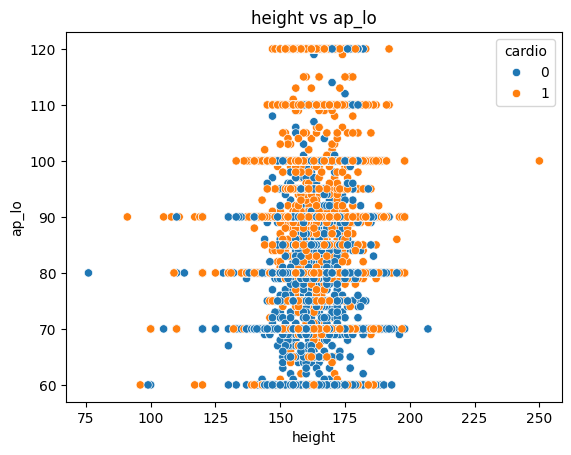

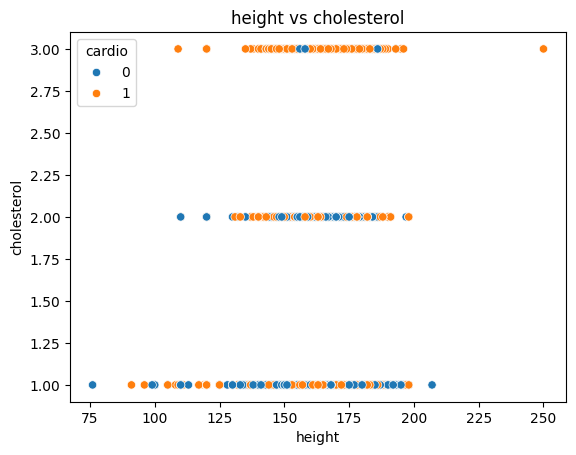

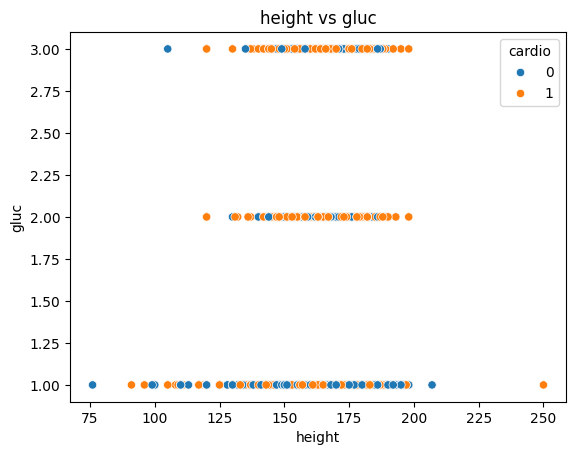

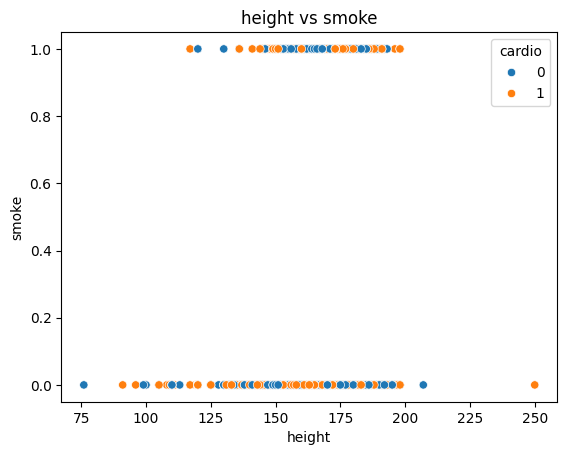

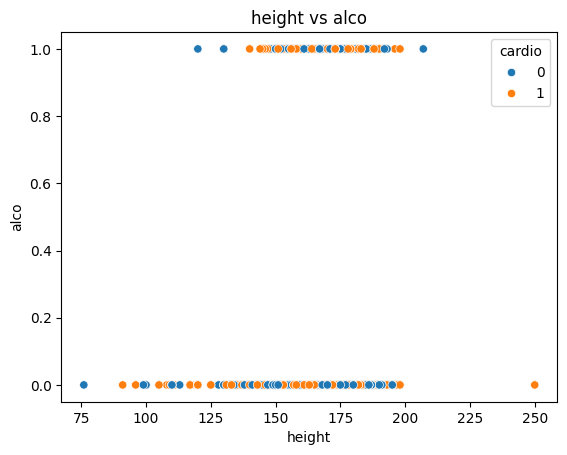

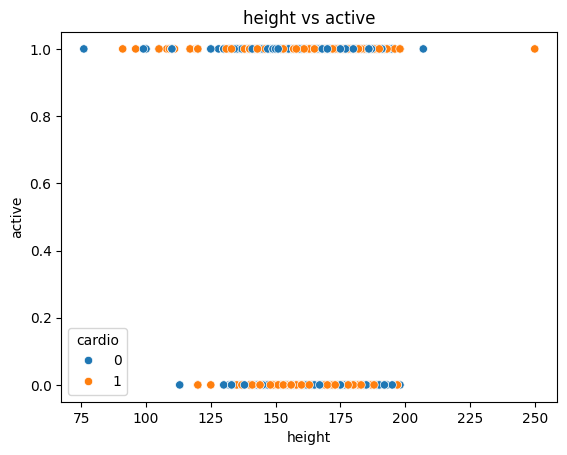

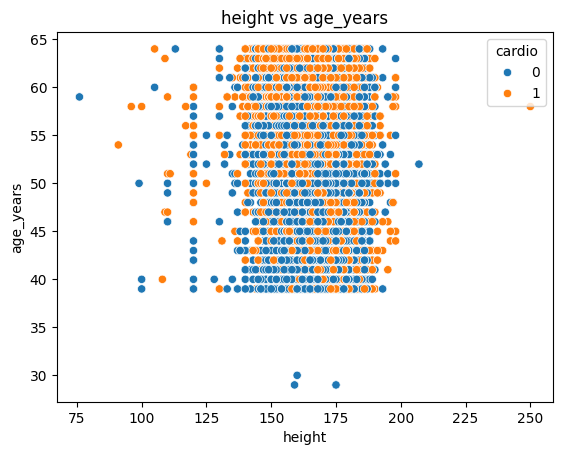

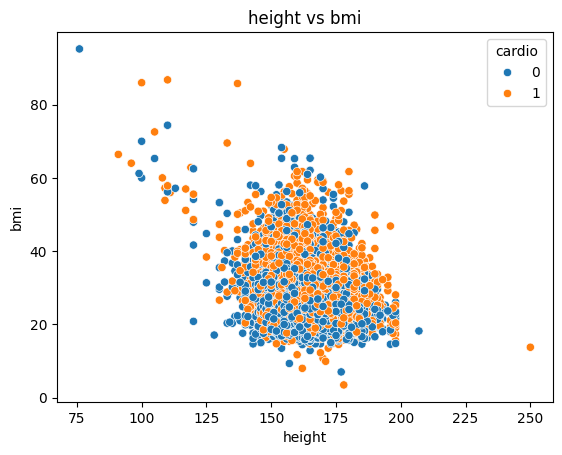

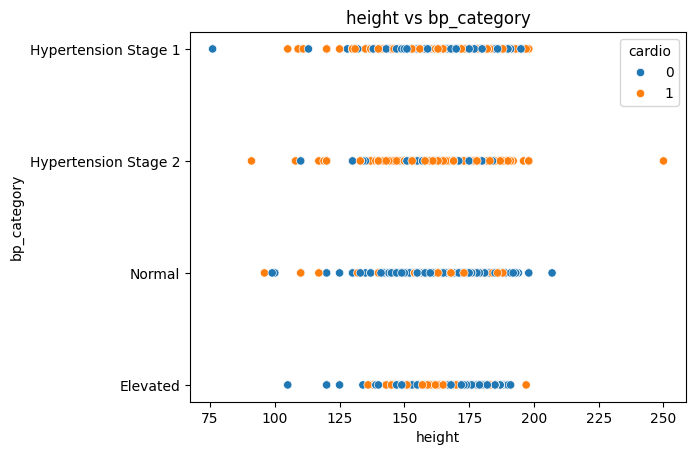

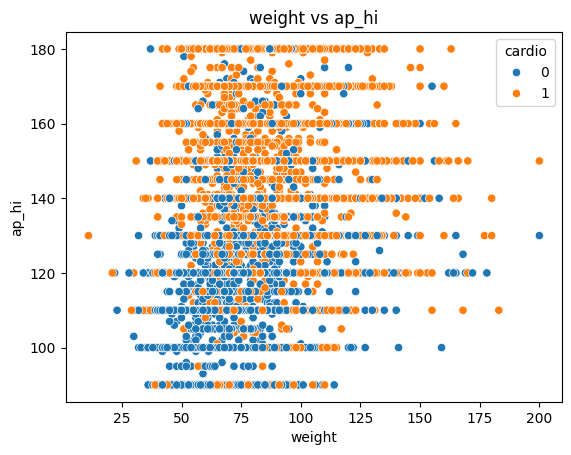

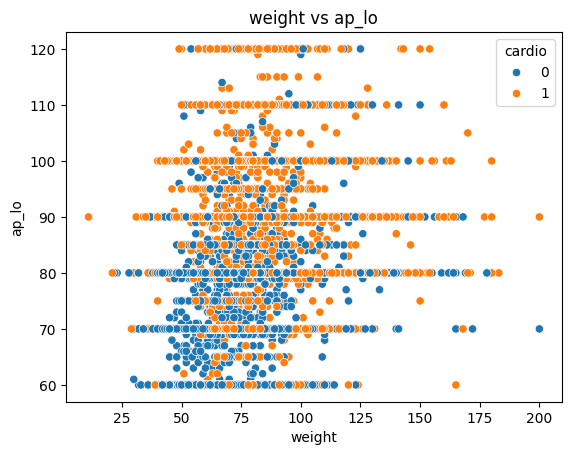

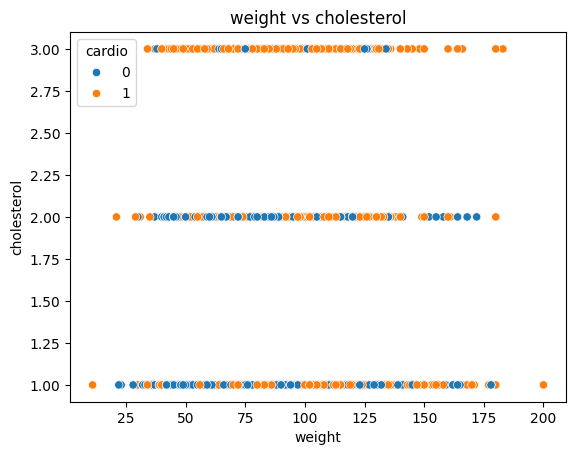

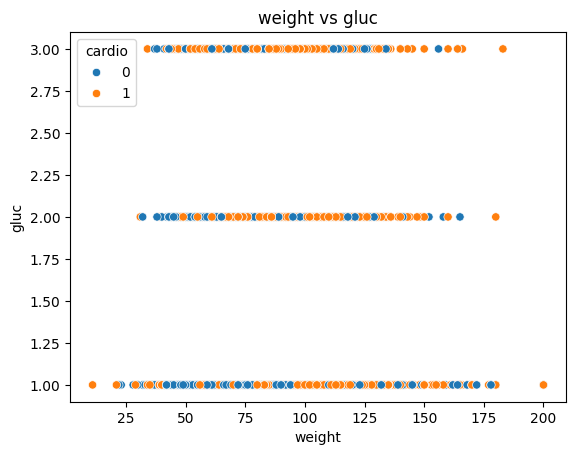

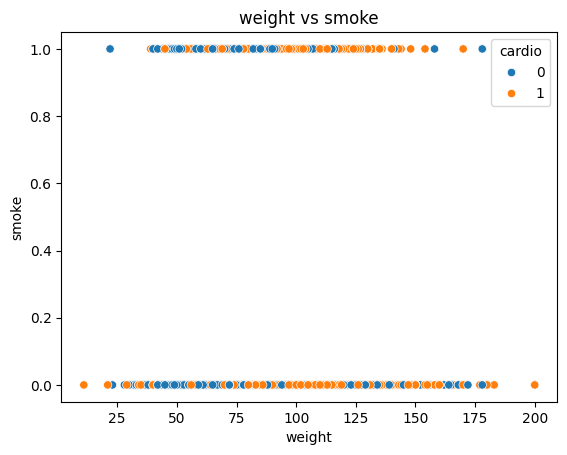

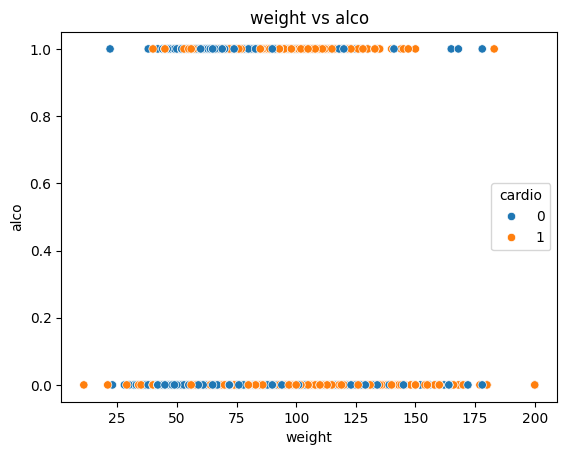

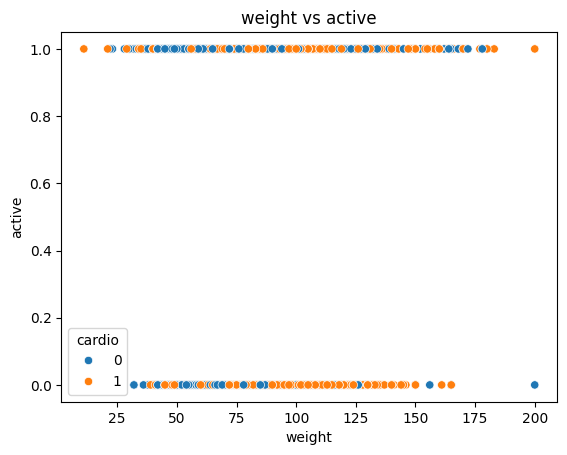

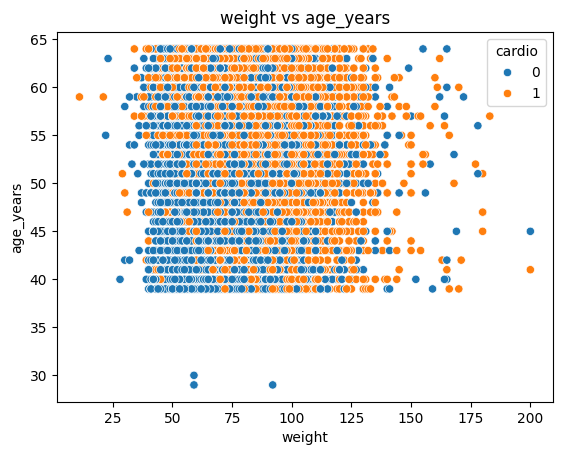

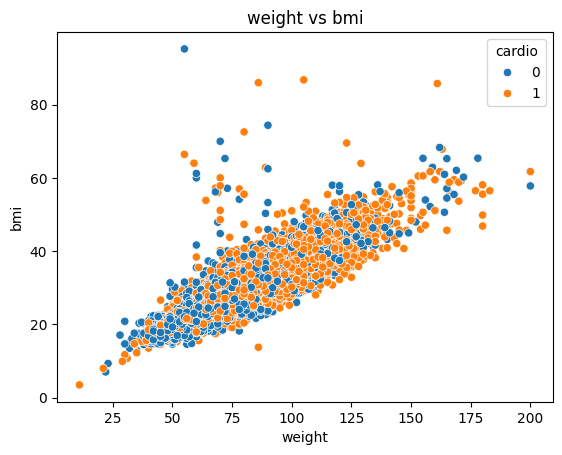

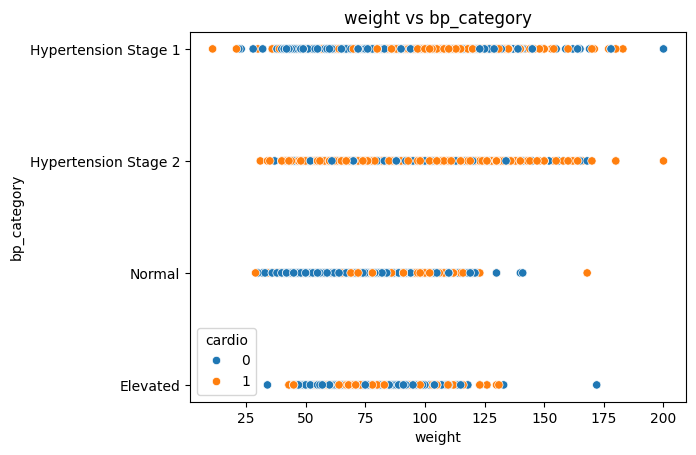

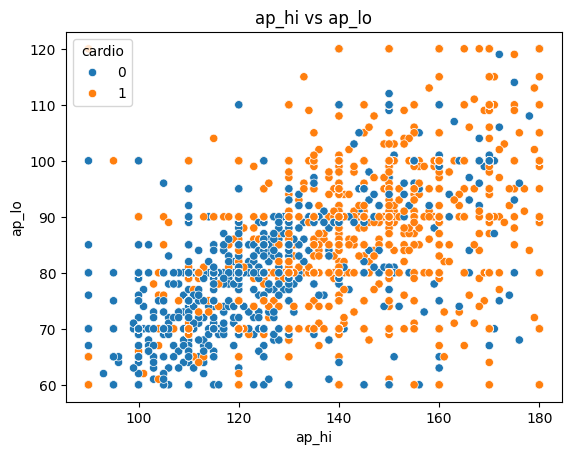

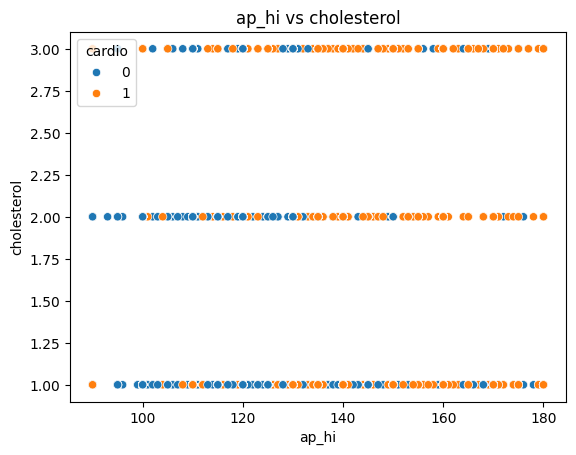

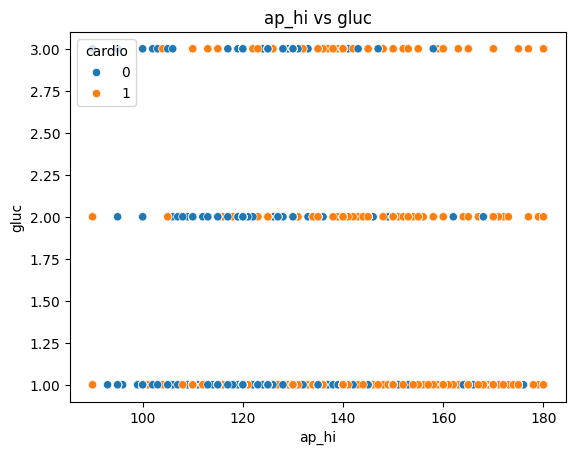

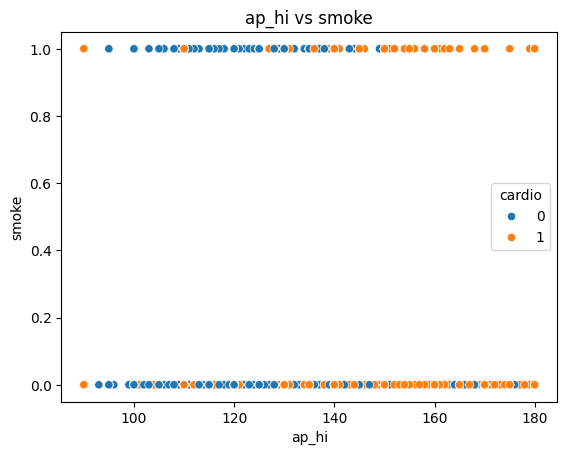

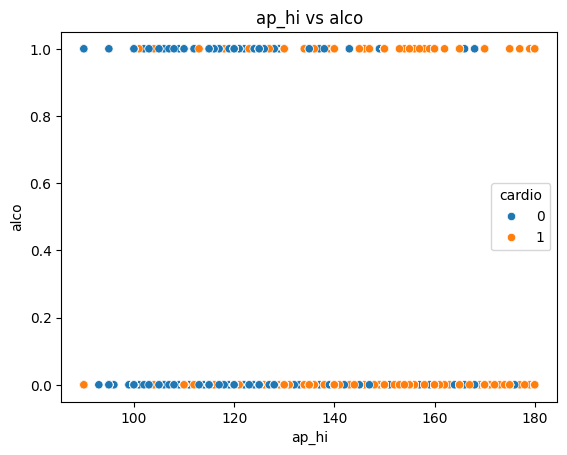

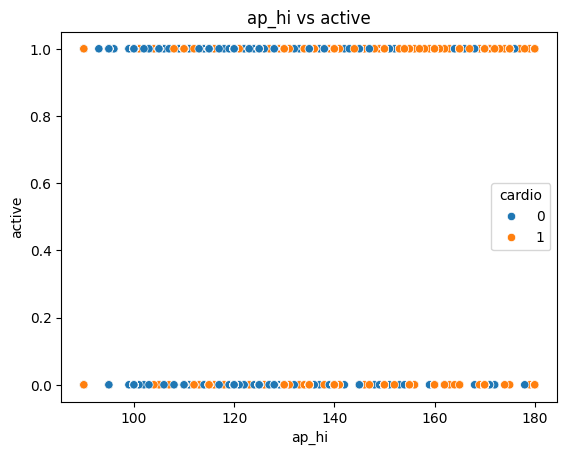

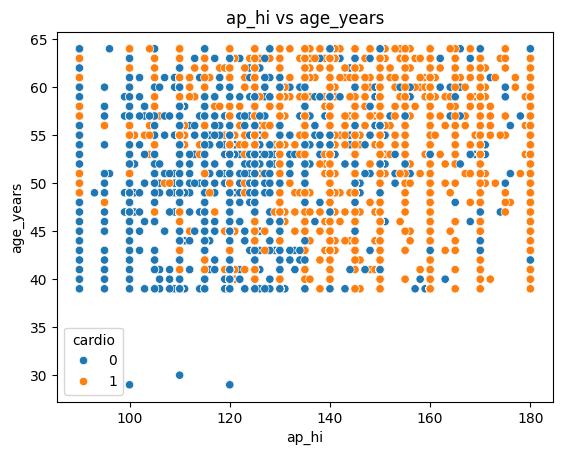

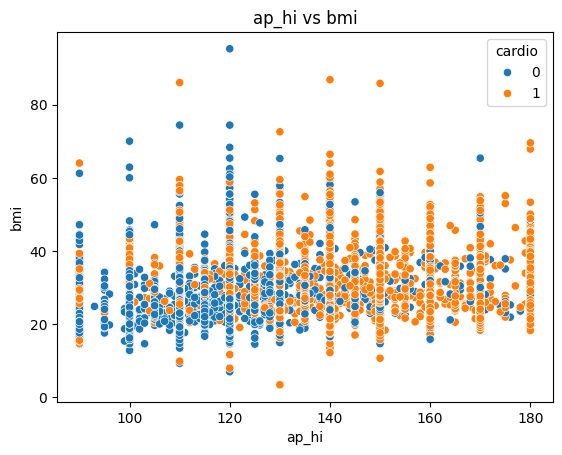

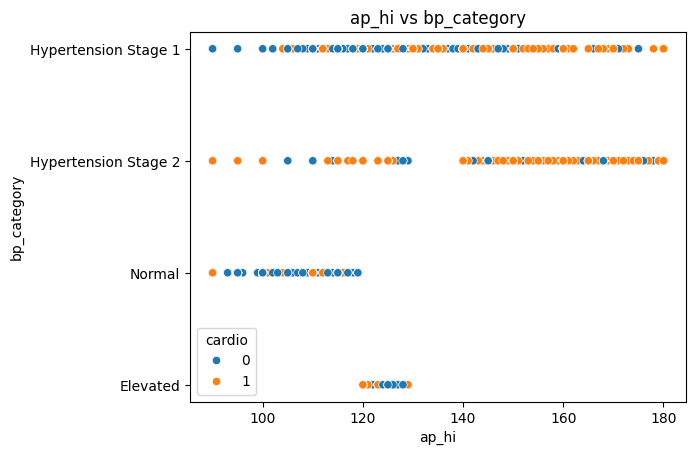

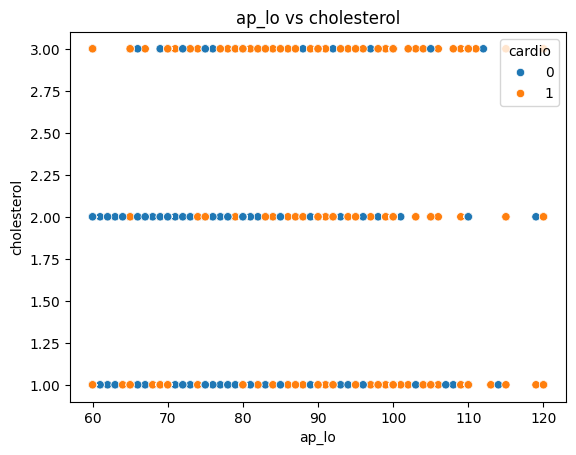

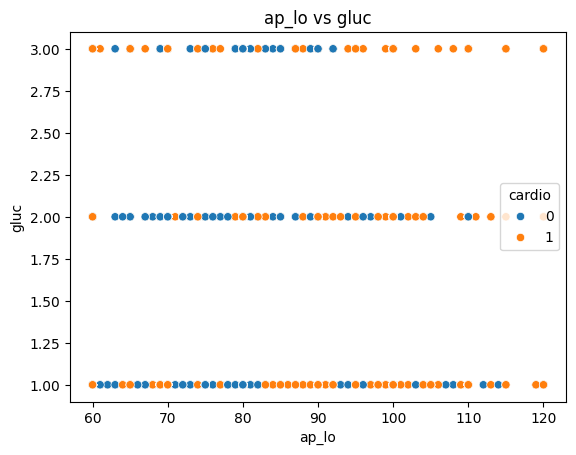

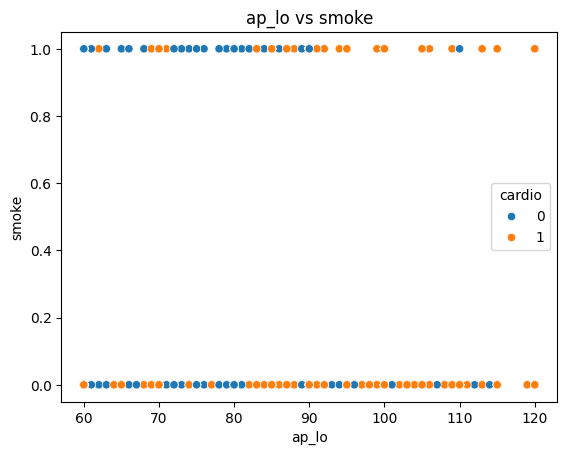

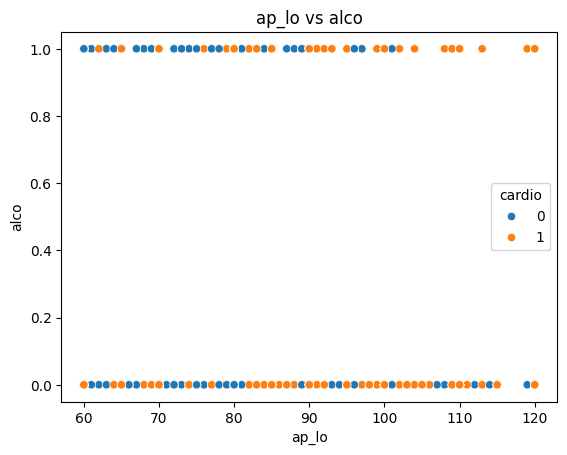

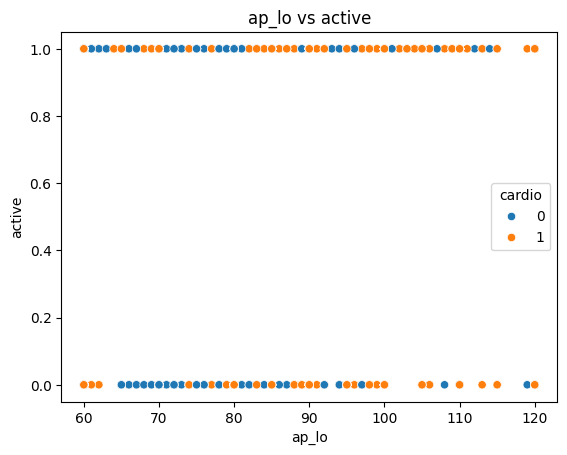

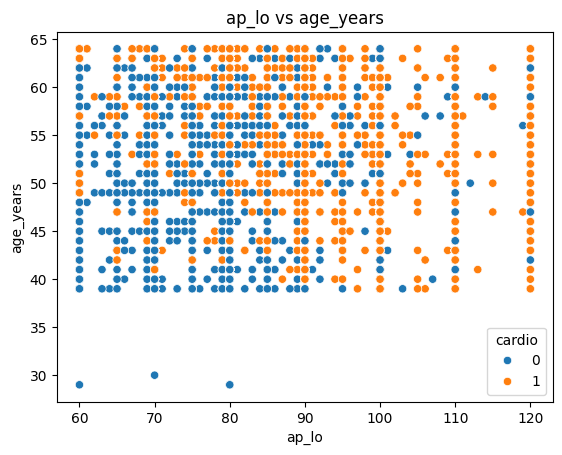

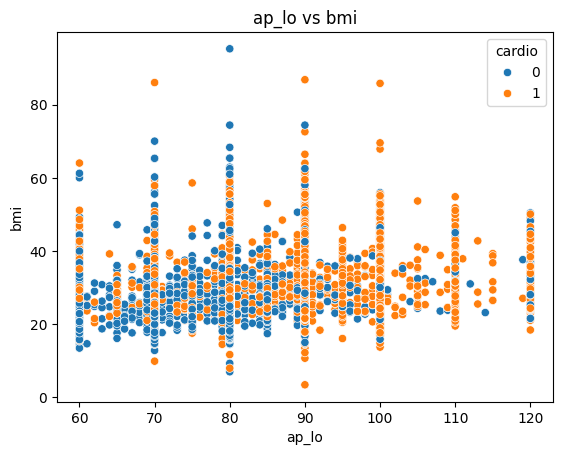

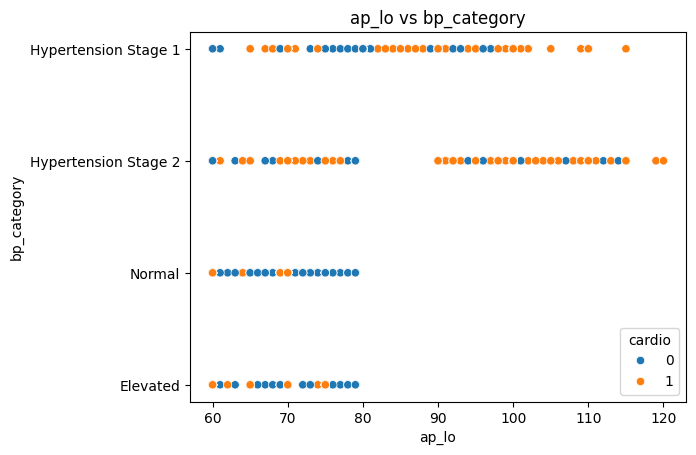

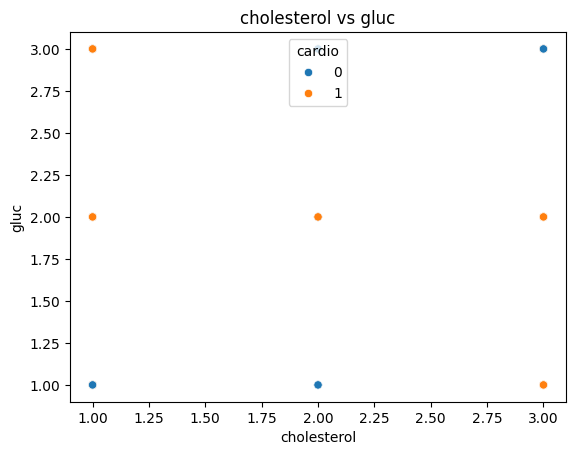

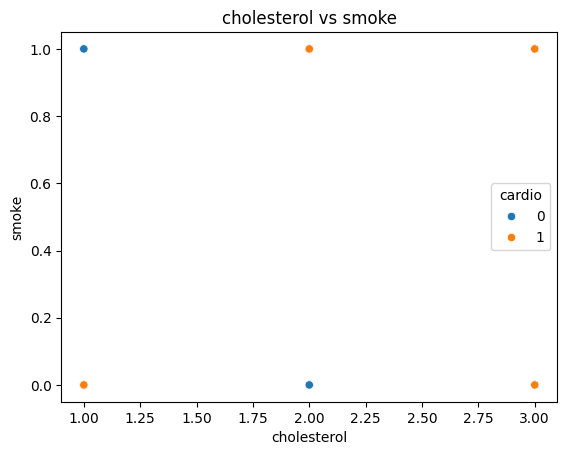

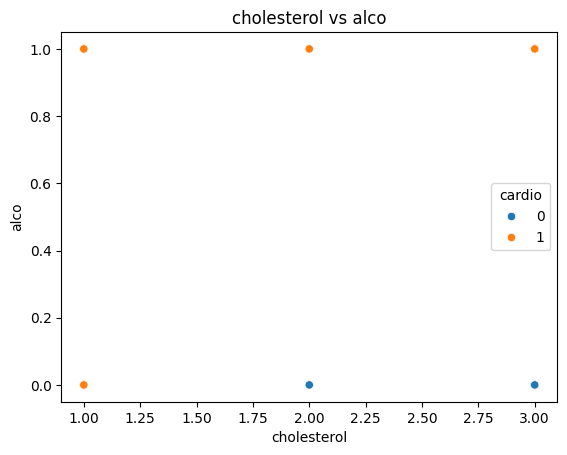

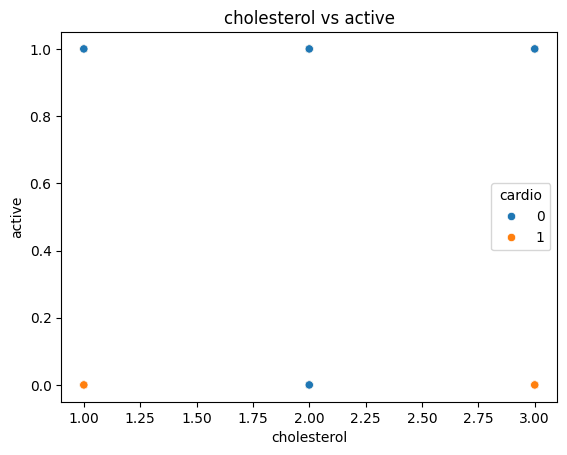

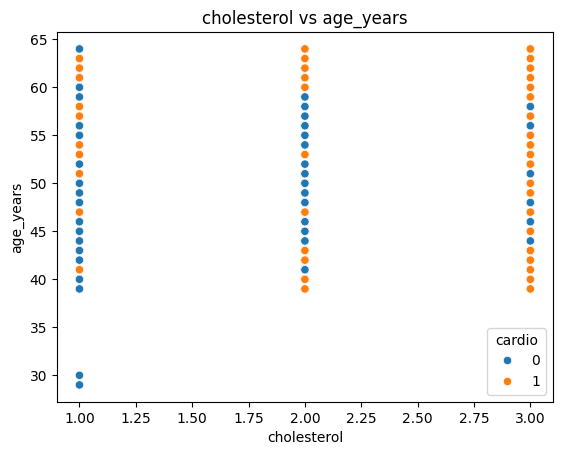

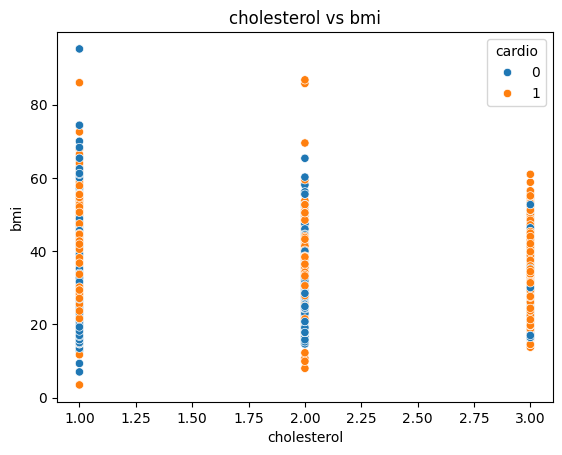

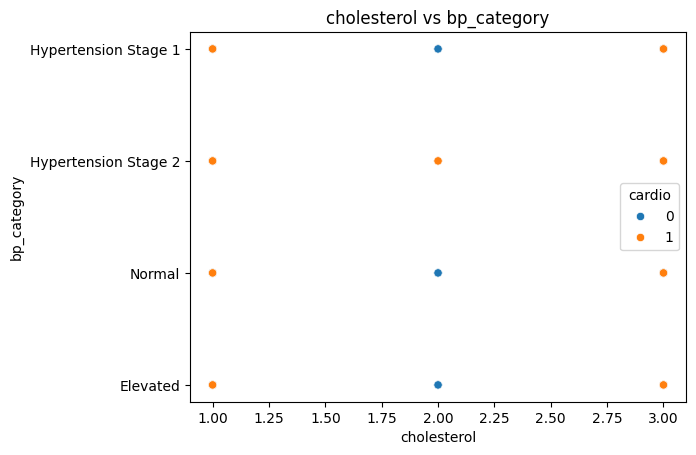

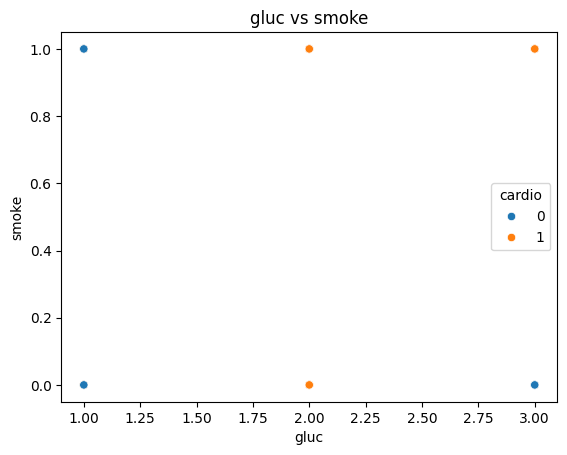

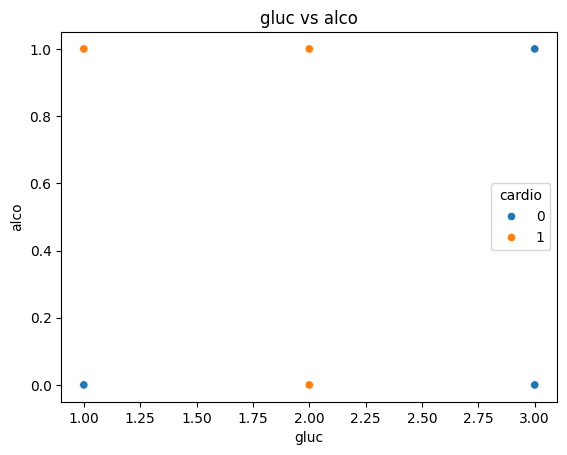

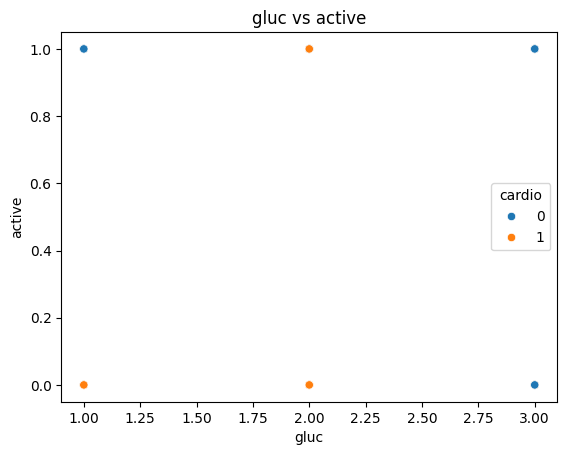

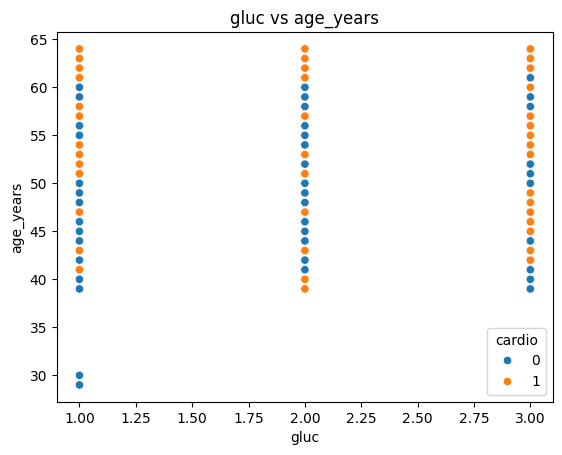

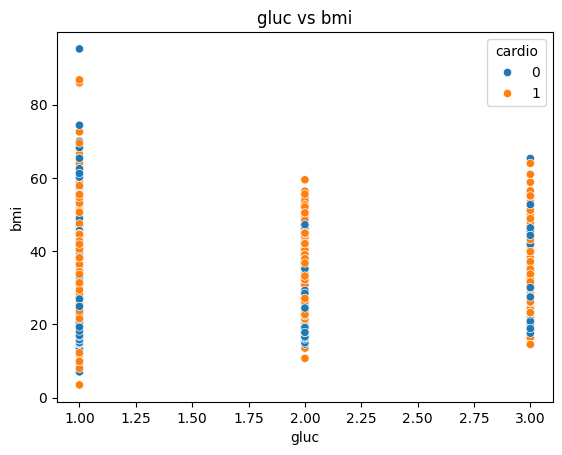

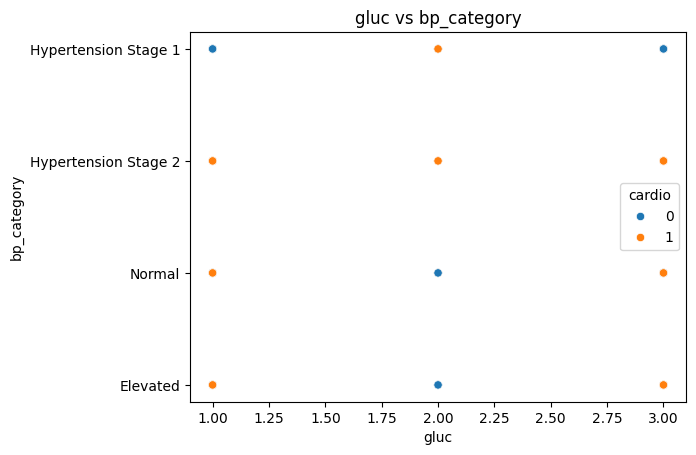

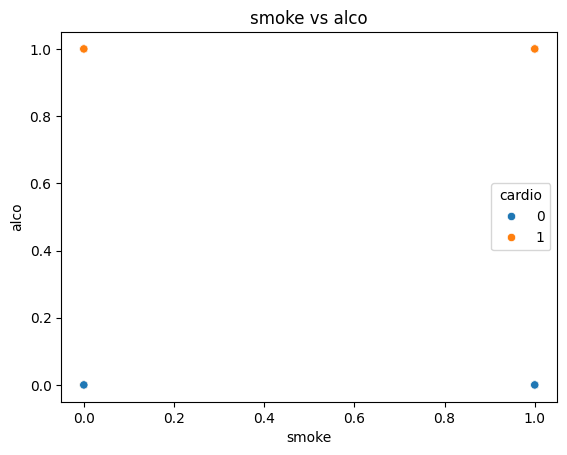

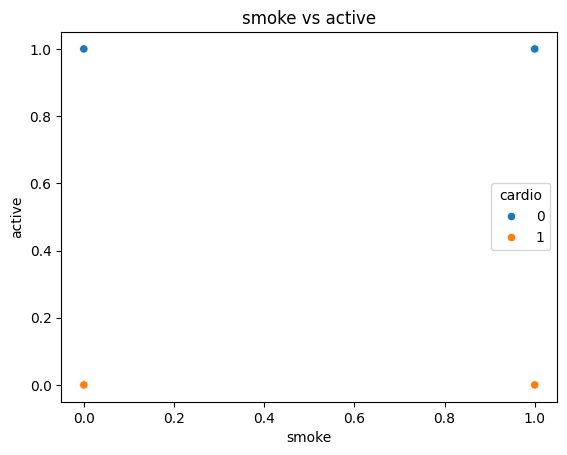

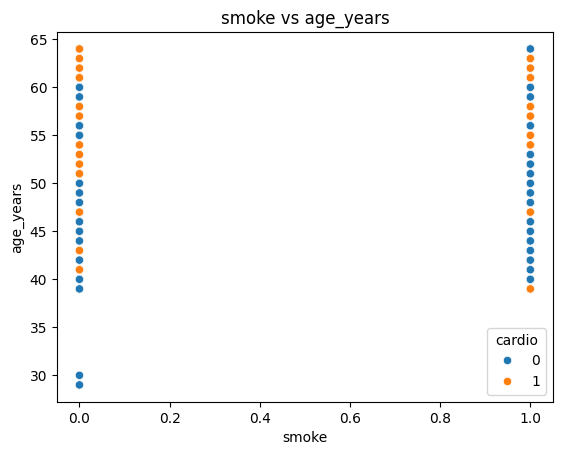

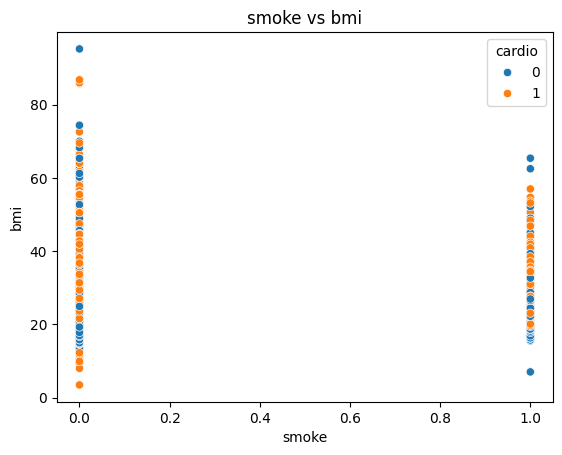

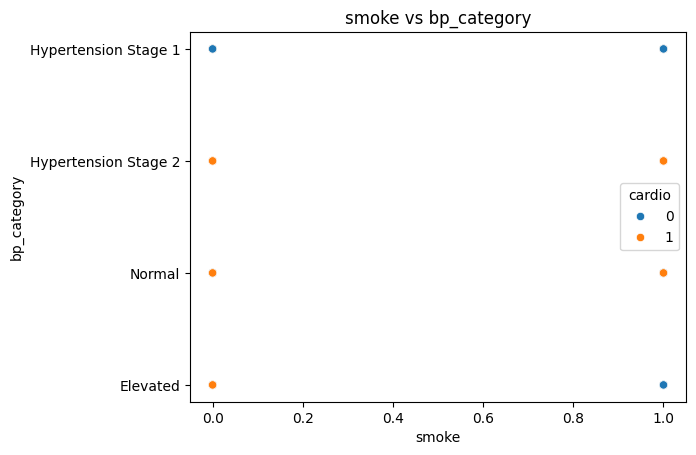

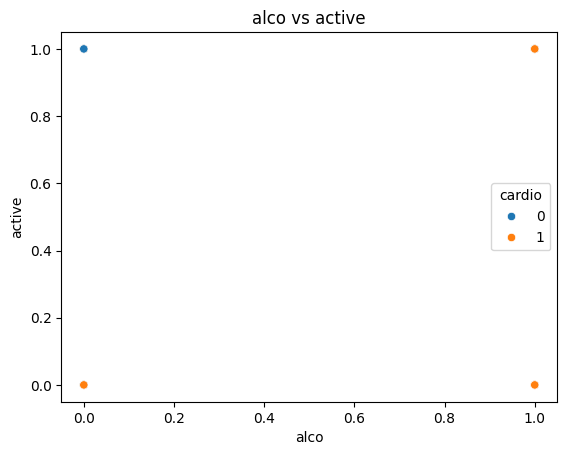

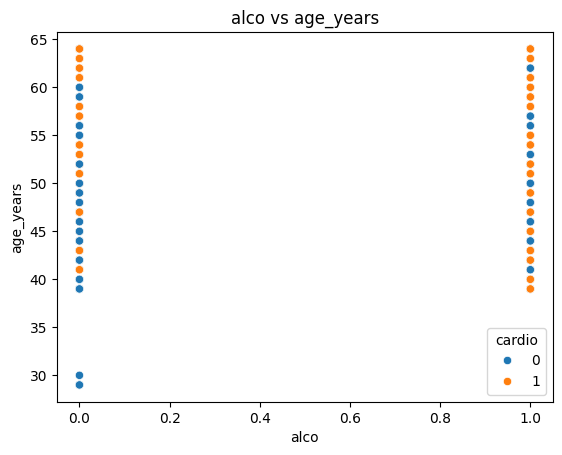

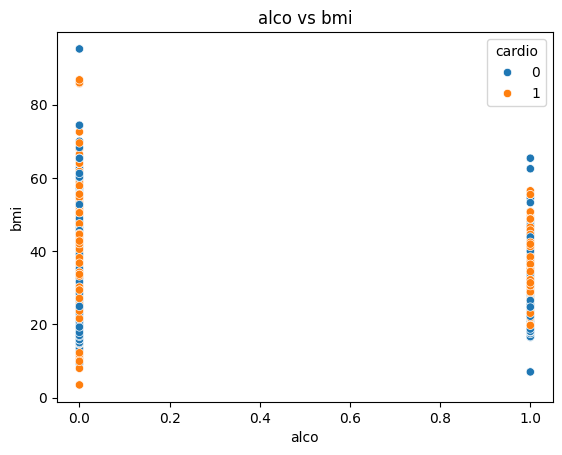

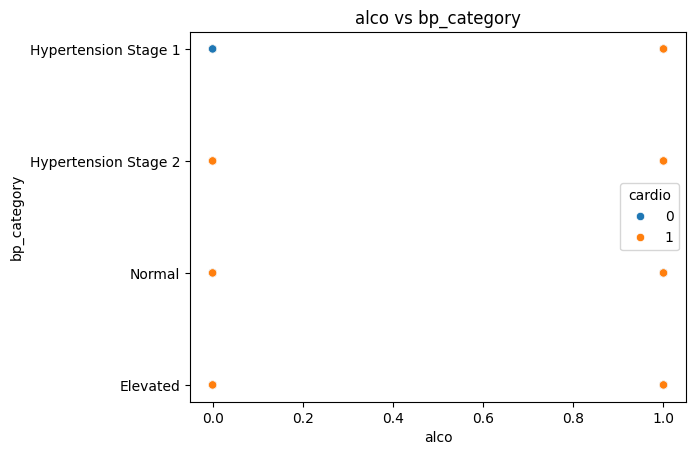

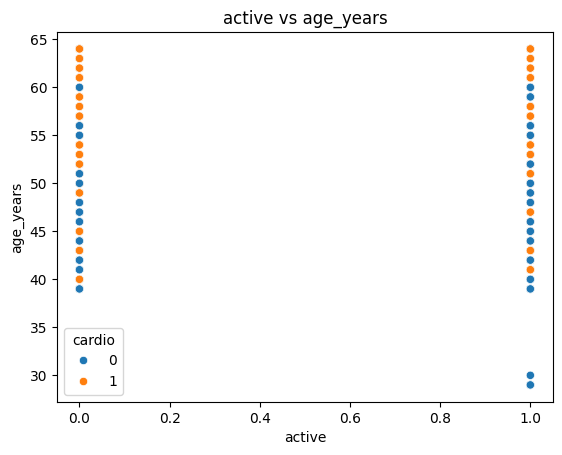

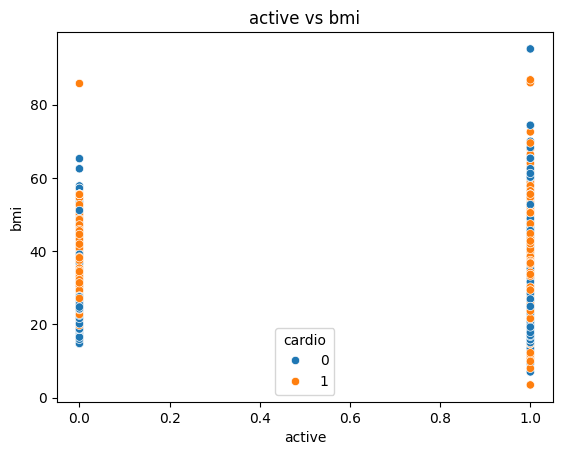

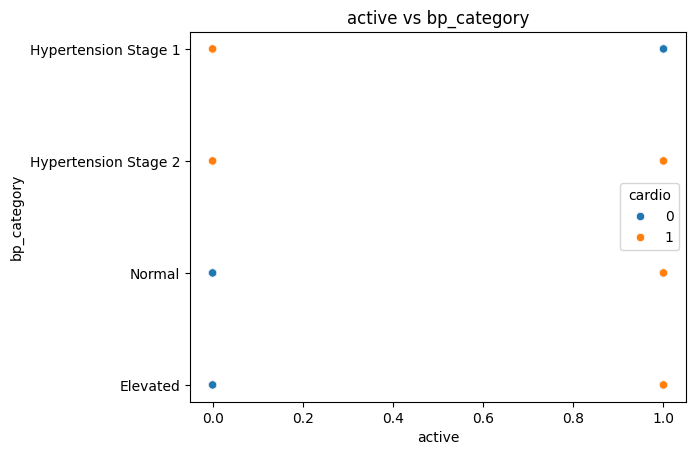

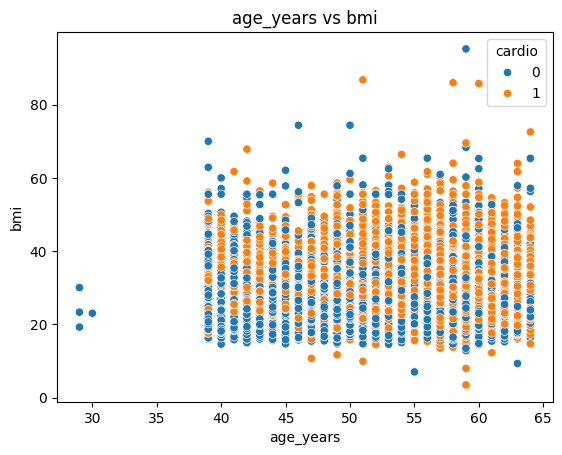

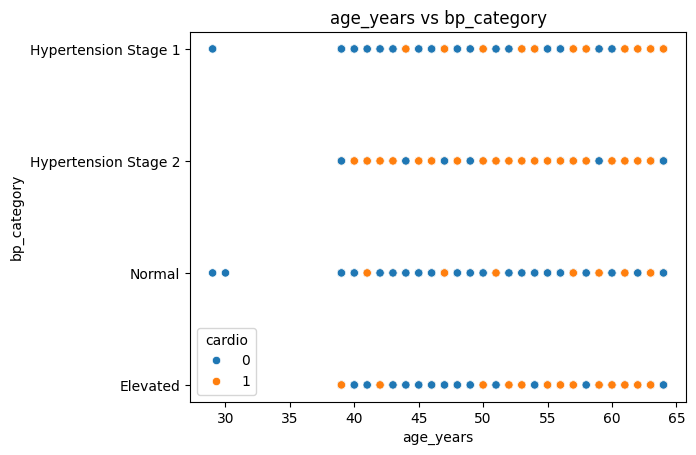

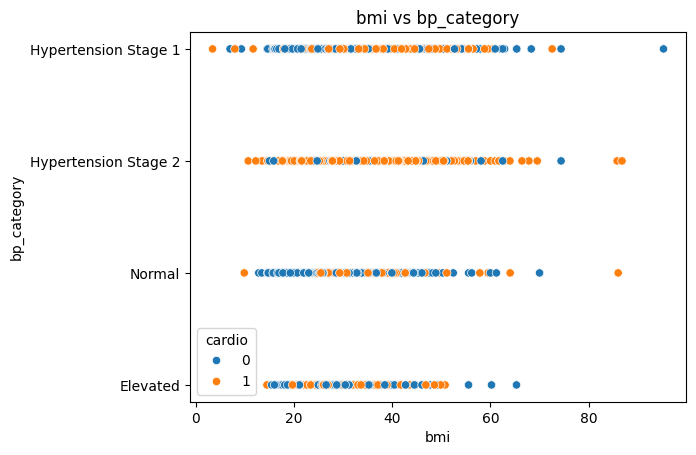

In [55]:
def check_pair(pair, pair_dict):
    f1, f2 = pair
    # If f1 already has f2 recorded or vice versa → duplicate
    if f1 in pair_dict and f2 in pair_dict[f1]:
        return False
    if f2 in pair_dict and f1 in pair_dict[f2]:
        return False
    return True

def append_pair(pair, pair_dict):
    f1, f2 = pair
    pair_dict.setdefault(f1, []).append(f2)
    pair_dict.setdefault(f2, []).append(f1)

pair_dict = dict()

for f1 in df.columns:
  for f2 in df.columns:
    if f1 == f2 or f1 == 'cardio' or f2 == 'cardio':
      continue
    else:
      pair = (f1, f2)
      if check_pair(pair, pair_dict):
        append_pair(pair, pair_dict)
        sns.scatterplot(data=df, x=f1, y=f2, hue='cardio')
        plt.title(f'{f1} vs {f2}')
        plt.show()

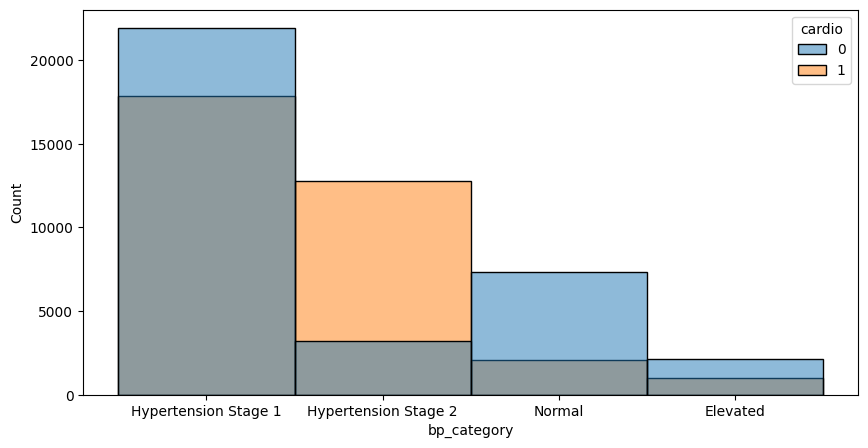

In [56]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=feature, hue='cardio')
    plt.show()

In [57]:
# encoding categorical attributes
OE=OrdinalEncoder(categories=[['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']])
OE.fit(df[['bp_category']])

df['bp_encoded']=OE.transform(df[['bp_category']])
df=df.drop(columns='bp_category',axis=1)

df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                         
0        2     168    62.0    110     80            1     1      0     0   
1        1     156    85.0    140     90            3     1      0     0   
2        1     165    64.0    130     70            3     1      0     0   
3        2     169    82.0    150    100            1     1      0     0   
4        1     156    56.0    100     60            1     1      0     0   

    active  cardio  age_years        bmi  bp_encoded  
id                                                    
0        1       0         50  21.967120         2.0  
1        1       1         55  34.927679         3.0  
2        0       1         51  23.507805         2.0  
3        1       1         48  28.710479         3.0  
4        0       0         47  23.011177         0.0

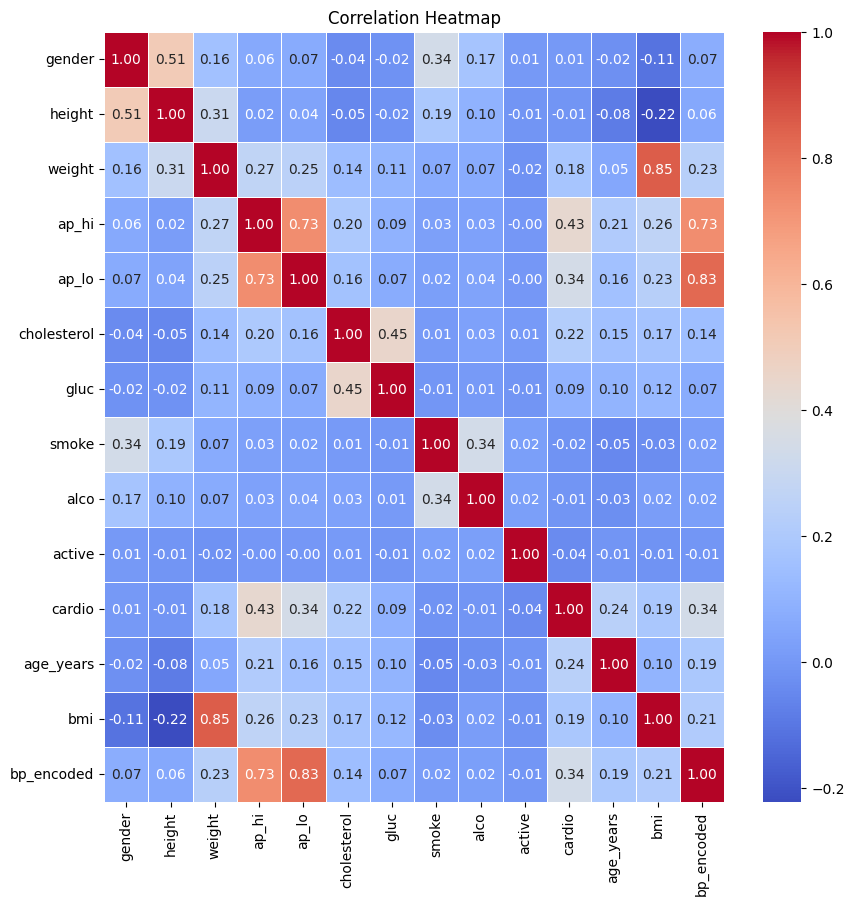

In [58]:
# Plots
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [59]:
corr_matrix['cardio']

gender         0.006119
height        -0.012320
weight         0.177992
ap_hi          0.433866
ap_lo          0.342909
cholesterol    0.220820
gluc           0.088833
smoke         -0.016644
alco          -0.008925
active        -0.038115
cardio         1.000000
age_years      0.238928
bmi            0.186362
bp_encoded     0.340783
Name: cardio, dtype: float64

In [60]:
# checking if dataset is misbalanced
df['cardio'].value_counts() / df.shape[0]

cardio
0    0.506285
1    0.493715
Name: count, dtype: float64

## Model training

Independent variable: Cardio \
Dependent variable:  ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi',
       'bp_category' ]

In [61]:
df.shape

(68179, 14)

In [62]:
df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                         
0        2     168    62.0    110     80            1     1      0     0   
1        1     156    85.0    140     90            3     1      0     0   
2        1     165    64.0    130     70            3     1      0     0   
3        2     169    82.0    150    100            1     1      0     0   
4        1     156    56.0    100     60            1     1      0     0   

    active  cardio  age_years        bmi  bp_encoded  
id                                                    
0        1       0         50  21.967120         2.0  
1        1       1         55  34.927679         3.0  
2        0       1         51  23.507805         2.0  
3        1       1         48  28.710479         3.0  
4        0       0         47  23.011177         0.0

In [63]:
y = df['cardio']
X = df.drop(['cardio'], axis=1)

In [64]:
y.shape, X.shape

((68179,), (68179, 13))

In [66]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=124)

In [67]:
X_train.shape, X_test.shape

((61361, 13), (6818, 13))

In [68]:
# standardizing the dataset
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
def save_result_data(result_data, csv_file_path="training-log/model_result.csv", dir='training-log'):
    if os.path.exists(csv_file_path):
        with open(csv_file_path, 'a') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(result_data)

    else:
        os.mkdir(dir)

        with open(csv_file_path, 'w') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['Name', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC_AUC Score'])
            csvwriter.writerow(result_data)

    csvfile.close()

def model_save(model,file_name, dir='model'):
    path = os.path.join(dir, file_name)

    if os.path.exists(dir):
        pass
    else:
        os.mkdir(dir)

    with open(path, 'wb') as file:
        pickle.dump(model, file)

In [70]:
def roc_auc_display(test_result, model_name):
    print(test_result)
    for name in model_name:
        fpr, tpr, _ = roc_curve(test_result['y_test'], test_result[name] )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Two Models')
    plt.legend()
    plt.show()

def evaluate_model(model_list, model_name):
    pred_log = dict()
    pred_log['y_test'] = y_test
    model_dict = dict()
    result_log = dict()


    for model, name in zip(model_list, model_name):
        model_base = model
        model_base.fit(X_train, y_train)
        y_pred = model_base.predict(X_test)
        pred_log[name] = y_pred
        model_dict[name] = model_base

        result = [
            name,
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred)
        ]

        print(result)
        # save_result_data(result)
        result_log[name] = result

        print(f'Confusion metrics {name}: ')
        conf_matrix = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
        cm_display.plot()
        plt.title(f'Model name: {name}')
        plt.show()

        file_name = name + ".pkl"
        # model_save(model, file_name)

    roc_auc_display(pred_log, model_name)

    return pred_log, model_dict, result_log

['log_reg', 0.732766207098856, 0.7585738539898133, 0.6678624813153962, 0.7103338632750398, np.float64(0.731570169537629)]
Confusion metrics log_reg: 


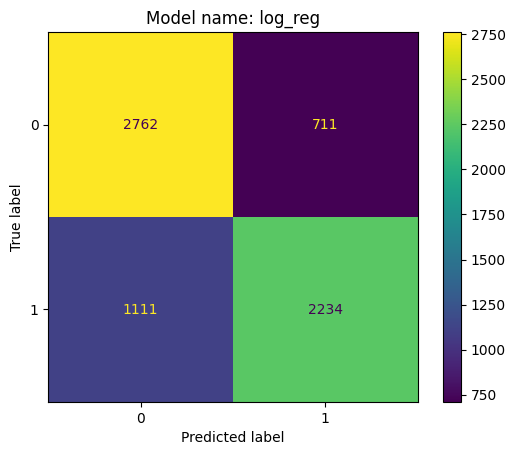

['clf', 0.7059254913464359, 0.7041438147471054, 0.690881913303438, 0.6974498264674815, np.float64(0.7056482702134811)]
Confusion metrics clf: 


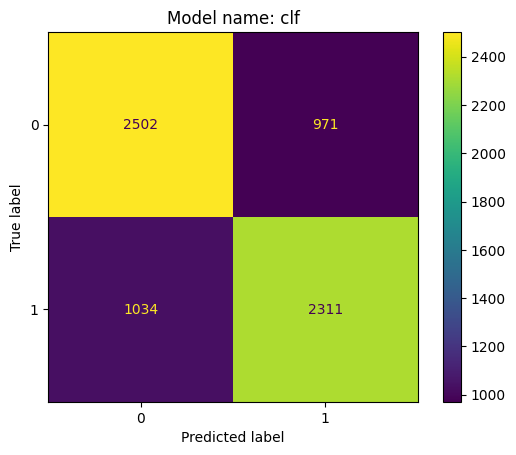

['gb', 0.7321795247873276, 0.7428845538855132, 0.6944693572496263, 0.7178615574783683, np.float64(0.7314846066409375)]
Confusion metrics gb: 


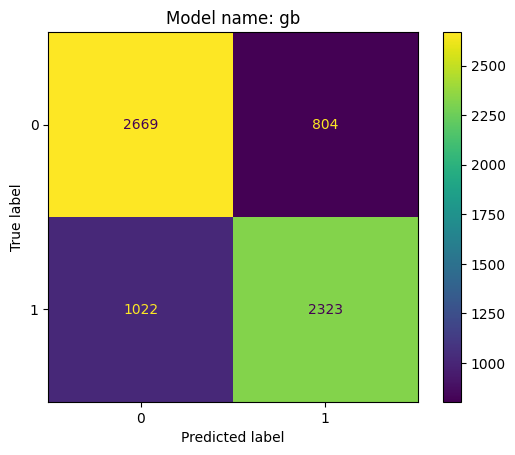

['ada', 0.7280727486066295, 0.758764317945158, 0.6535127055306428, 0.7022165114037906, np.float64(0.7266987656648319)]
Confusion metrics ada: 


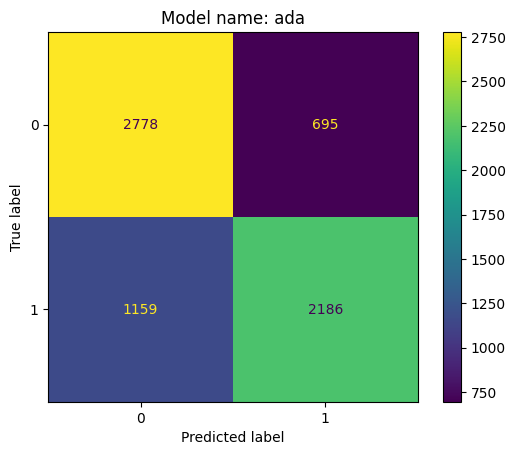

['dt_gini', 0.6365503080082136, 0.6322856270979554, 0.6194319880418535, 0.6257928118393234, np.float64(0.636234853796337)]
Confusion metrics dt_gini: 


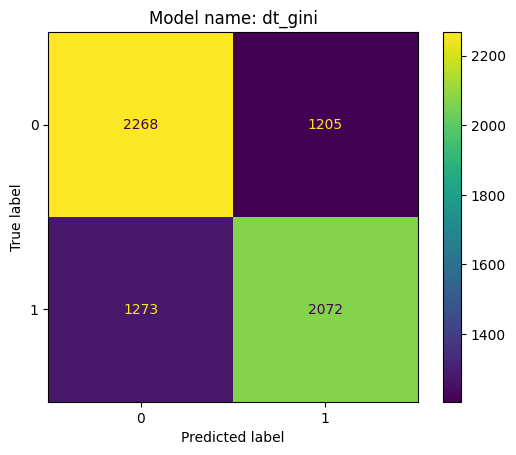

['dt_en', 0.6344969199178645, 0.629911666159001, 0.6182361733931241, 0.624019312009656, np.float64(0.634197268959735)]
Confusion metrics dt_en: 


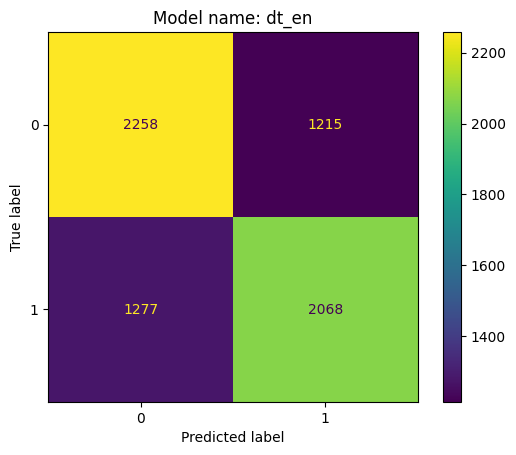

['knn', 0.6950718685831622, 0.6924012158054711, 0.68101644245142, 0.6866616428033158, np.float64(0.6948128569872994)]
Confusion metrics knn: 


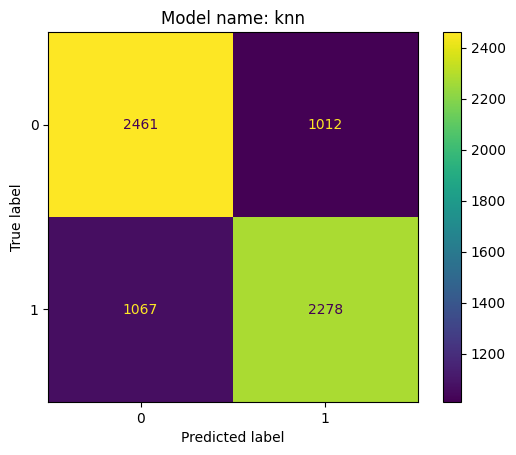

['svc', 0.7346729246113229, 0.7592842673869007, 0.6723467862481315, 0.7131758363722848, np.float64(0.7335243865015493)]
Confusion metrics svc: 


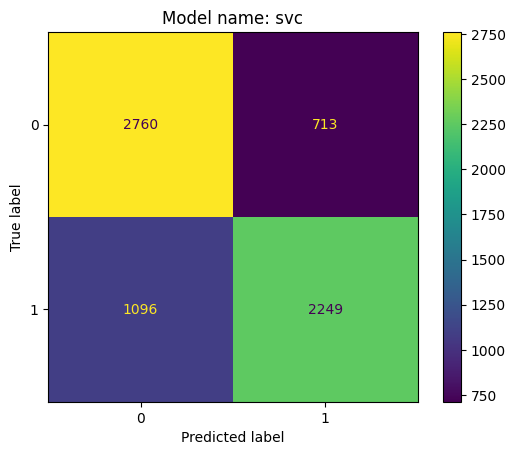

['gnb', 0.7161924317981813, 0.7411080711354309, 0.6478325859491779, 0.6913383314723242, np.float64(0.7149327052982284)]
Confusion metrics gnb: 


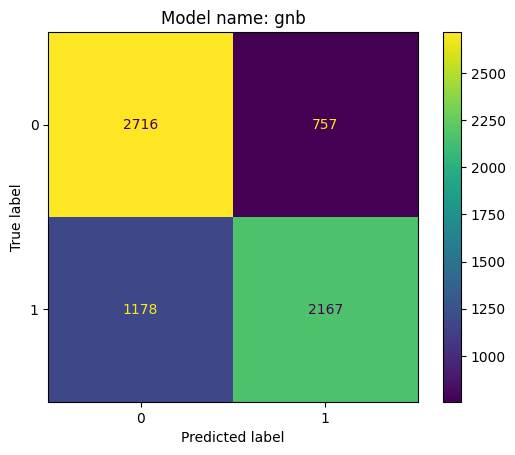

['bnb', 0.7154590789087709, 0.7310095363367314, 0.6645739910313901, 0.6962104603820858, np.float64(0.7145213750146873)]
Confusion metrics bnb: 


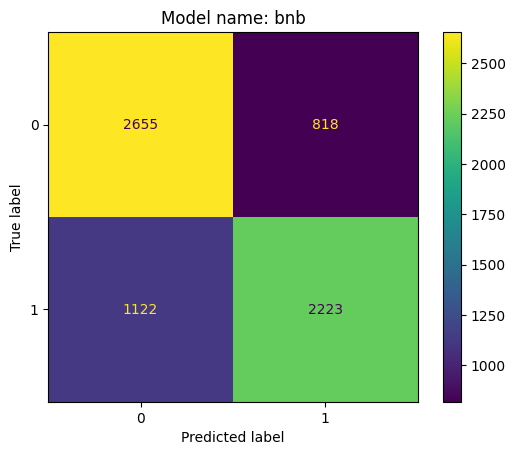

['mlp', 0.7295394543854503, 0.7412407585985213, 0.6893871449925262, 0.7143742255266419, np.float64(0.7287995327611638)]
Confusion metrics mlp: 


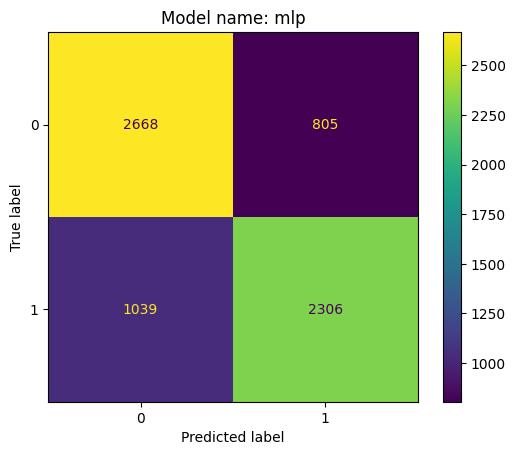

{'y_test': id
33342    0
66618    0
12047    0
13910    1
64306    1
        ..
42831    0
58695    1
97751    0
31855    0
78295    1
Name: cardio, Length: 6818, dtype: int64, 'log_reg': array([0, 1, 0, ..., 1, 0, 1]), 'clf': array([1, 1, 0, ..., 1, 0, 1]), 'gb': array([1, 1, 0, ..., 1, 0, 1]), 'ada': array([1, 1, 0, ..., 1, 0, 1]), 'dt_gini': array([1, 1, 0, ..., 0, 1, 1]), 'dt_en': array([0, 1, 0, ..., 1, 0, 1]), 'knn': array([1, 0, 0, ..., 1, 0, 1]), 'svc': array([0, 1, 0, ..., 1, 0, 1]), 'gnb': array([1, 1, 0, ..., 0, 0, 1]), 'bnb': array([1, 1, 0, ..., 1, 0, 1]), 'mlp': array([0, 1, 0, ..., 1, 0, 1])}


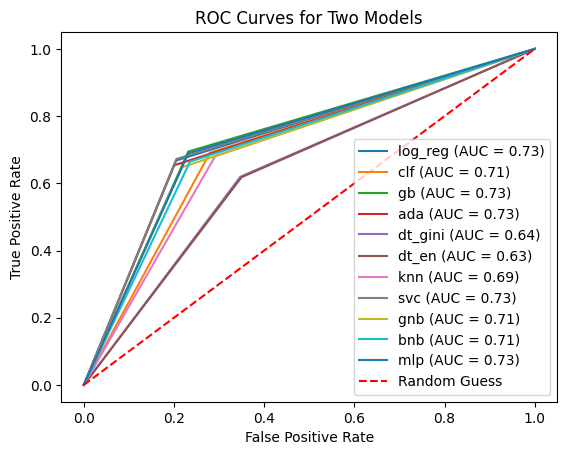

In [72]:
# Model
model_logistic_regression = LogisticRegression()
model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt_en = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_svc = SVC()
model_gnb = GaussianNB()
model_bnb = BernoulliNB()
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100, random_state=42)

model_list = [model_logistic_regression, model_clf, model_gb, model_ada, model_dt_gini, model_dt_en, model_knn, model_svc, model_gnb, model_bnb, model_mlp]
model_name = ["log_reg", "clf", "gb", "ada", "dt_gini", "dt_en", "knn", "svc", "gnb", "bnb", "mlp"]

# model_list = [model_logistic_regression]
# model_name = ['log_reg']
pred_log, model_log, result_log = evaluate_model(model_list, model_name)


In [73]:
# Feature importance
print("Feature importance (Logistic Regression) (Coefficient and Odds Ratio):: ")
model_log_reg = model_log['log_reg']

# Coefficients and Odds Ratios
coefficients = model_log_reg.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Feature importance (Logistic Regression) (Coefficient and Odds Ratio):: 
        Feature  Coefficient  Odds Ratio
3         ap_hi     0.934630    2.546271
10    age_years     0.349632    1.418545
5   cholesterol     0.333072    1.395248
4         ap_lo     0.125598    1.133826
2        weight     0.088414    1.092440
11          bmi     0.061339    1.063259
1        height     0.002112    1.002114
0        gender    -0.009806    0.990242
12   bp_encoded    -0.033040    0.967500
7         smoke    -0.035083    0.965526
8          alco    -0.051426    0.949874
6          gluc    -0.069843    0.932540
9        active    -0.092929    0.911259


Feature importance (Random Forest) (Coefficient and Odds Ratio):: 


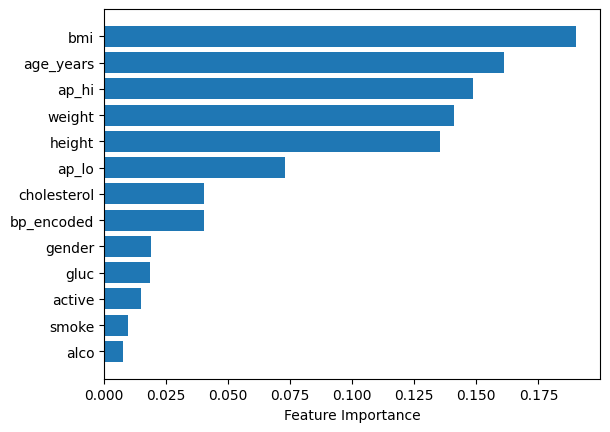

In [74]:
# Feature importance
print("Feature importance (Random Forest) (Coefficient and Odds Ratio):: ")
clf = model_log['clf']
importances = clf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

According to the above table and chart, we can say that bmi, age, weight, height, cholestrol, blood pressure are some important factors in deciding whether someone is getting a cardiovascular disease.

In [75]:
import optuna
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

X, y = df.drop("cardio", axis=1), df["cardio"]

def objective(trial):
    # Choose a model
    model_name = trial.suggest_categorical("model", ["svc", "knn", "lgbm", "gb"])

    if model_name == "svc":
        params = {
            "C": trial.suggest_loguniform("C", 1e-3, 1e3),
            "gamma": trial.suggest_loguniform("gamma", 1e-4, 1e1),
            "kernel": trial.suggest_categorical("kernel", ["rbf", "poly", "sigmoid"])
        }
        model = SVC(**params)

    elif model_name == "knn":
        params = {
            "n_neighbors": trial.suggest_int("n_neighbors", 3, 50),
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
            "p": trial.suggest_int("p", 1, 2)  # 1=manhattan, 2=euclidean
        }
        model = KNeighborsClassifier(**params)

    elif model_name == "lgbm":
        params = {
            "num_leaves": trial.suggest_int("num_leaves", 20, 300),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.3),
            "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
            "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
        }
        model = lgb.LGBMClassifier(**params)

    elif model_name == "gb":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
            "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.3),
            "max_depth": trial.suggest_int("max_depth", 2, 10),
            "subsample": trial.suggest_uniform("subsample", 0.5, 1.0)
        }
        model = GradientBoostingClassifier(**params)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    return scores.mean()

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial:")
print("  Value: ", study.best_trial.value)
print("  Params: ", study.best_trial.params)


ModuleNotFoundError: No module named 'optuna'